In [622]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [623]:
df = pd.read_csv('Combined_WR.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [624]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_avg_depth_of_target', 'weighted_avg_avoided_tackles',
       'weighted_avg_caught_percent', 'weighted_avg_contested_catch_rate',
       'weighted_avg_contested_receptions', 'weighted_avg_contested_targets',
       'weighted_avg_declined_penalties', 'weighted_avg_drop_rate',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_fumbles',
       'weighted_avg_grades_hands_drop', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_route',
       'weighted_avg_inline_rate', 'weighted_avg_interceptions',
       'weighted_avg_longest', 'weighted_avg_pass_block_rate',
       'weighted_avg_pass_blocks', 'weighted_avg_pass_plays',
       'weighted_avg_penalties', 'weighted

In [625]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [626]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       WR         5.419766        331.370639         17.0   
50   49ers  2020       WR         4.631685        605.449663         24.0   
70   49ers  2021       WR         4.416438        315.748468         18.0   
123  49ers  2022       WR         6.700288        253.620355         26.0   
12   Bears  2019       WR        15.531350        186.577541         20.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         24.0     63.513776    69.554946     27.90%  ...   
50         18.0     69.554946    71.292028      5.40%  ...   
70         26.0     71.292028    74.381042     19.50%  ...   
123        26.0     74.381042    73.373080     27.60%  ...   
12         22.0     67.241234    67.376749     -2.10%  ...   

     Previous_slot_rate  Previous_targeted_qb_rating  Previous_targets  \
17            36.339349                    92.858737         42.852679   
50            35

In [627]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001DC2960B310>>


In [628]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_targeted_qb_rating','Current_AV', 'weighted_avg_caught_percent',
                                         'weighted_avg_touchdowns', 'weighted_avg_yprr', 'weighted_avg_yards_after_catch', 
                                         'Value_cap_space',]]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list



# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [629]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[ 94.33939394  24.          64.37815895   3.40194397   1.54209262
   221.24413951   5.41976621]
  [ 91.05386064  18.          66.70056497   2.29190207   1.53842436
   226.54111739   4.63168517]
  [107.22136808  26.          64.79687296   4.36221498   1.8937785
   389.06058632   4.41643836]]

 [[ 85.88213387  22.          61.99375944   3.64116759   1.33092602
   170.07800705  15.53134963]
  [ 86.65986985  25.          65.4962039    3.76626898   1.39550434
   225.51789588  12.47729566]
  [ 71.12708221  20.          60.16061257   2.04298764   1.27338528
   196.72810317  11.41917808]]

 [[ 72.48576372  19.          55.9954523    2.29065744   1.45240237
   225.59218982   6.89691817]
  [ 83.59354043  21.          60.96331361   3.21893491   1.41608974
   203.85946746  15.58526741]
  [107.73947368  31.          67.7755934    7.16873065   1.95020124
   401.31011352  10.85479452]]

 [[ 90.04700489  20.          61.1542176    4.15525672   1.5080868
   220.79278729   9.84590861]
  [114.54349236 

In [630]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [631]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [632]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [633]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.6899 - val_loss: 0.2372
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2243 - val_loss: 0.1570
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1037 - val_loss: 0.0046
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2502 - val_loss: 0.0173
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1458 - val_loss: 0.0065


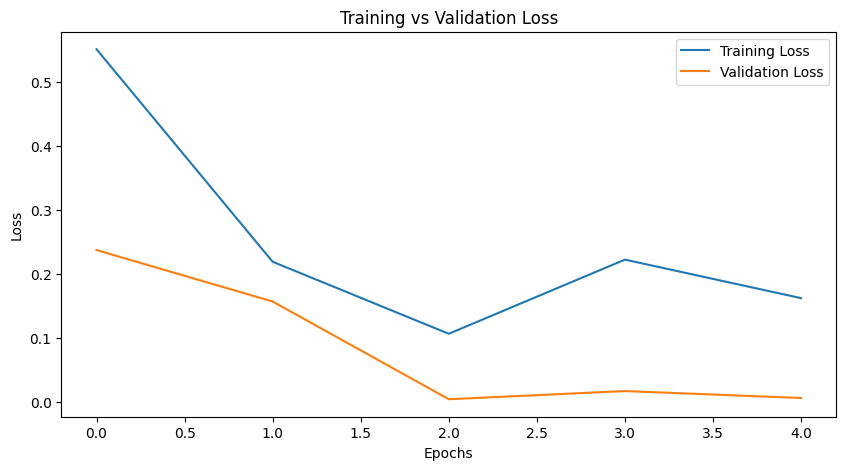

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
R² Score: -1.3743


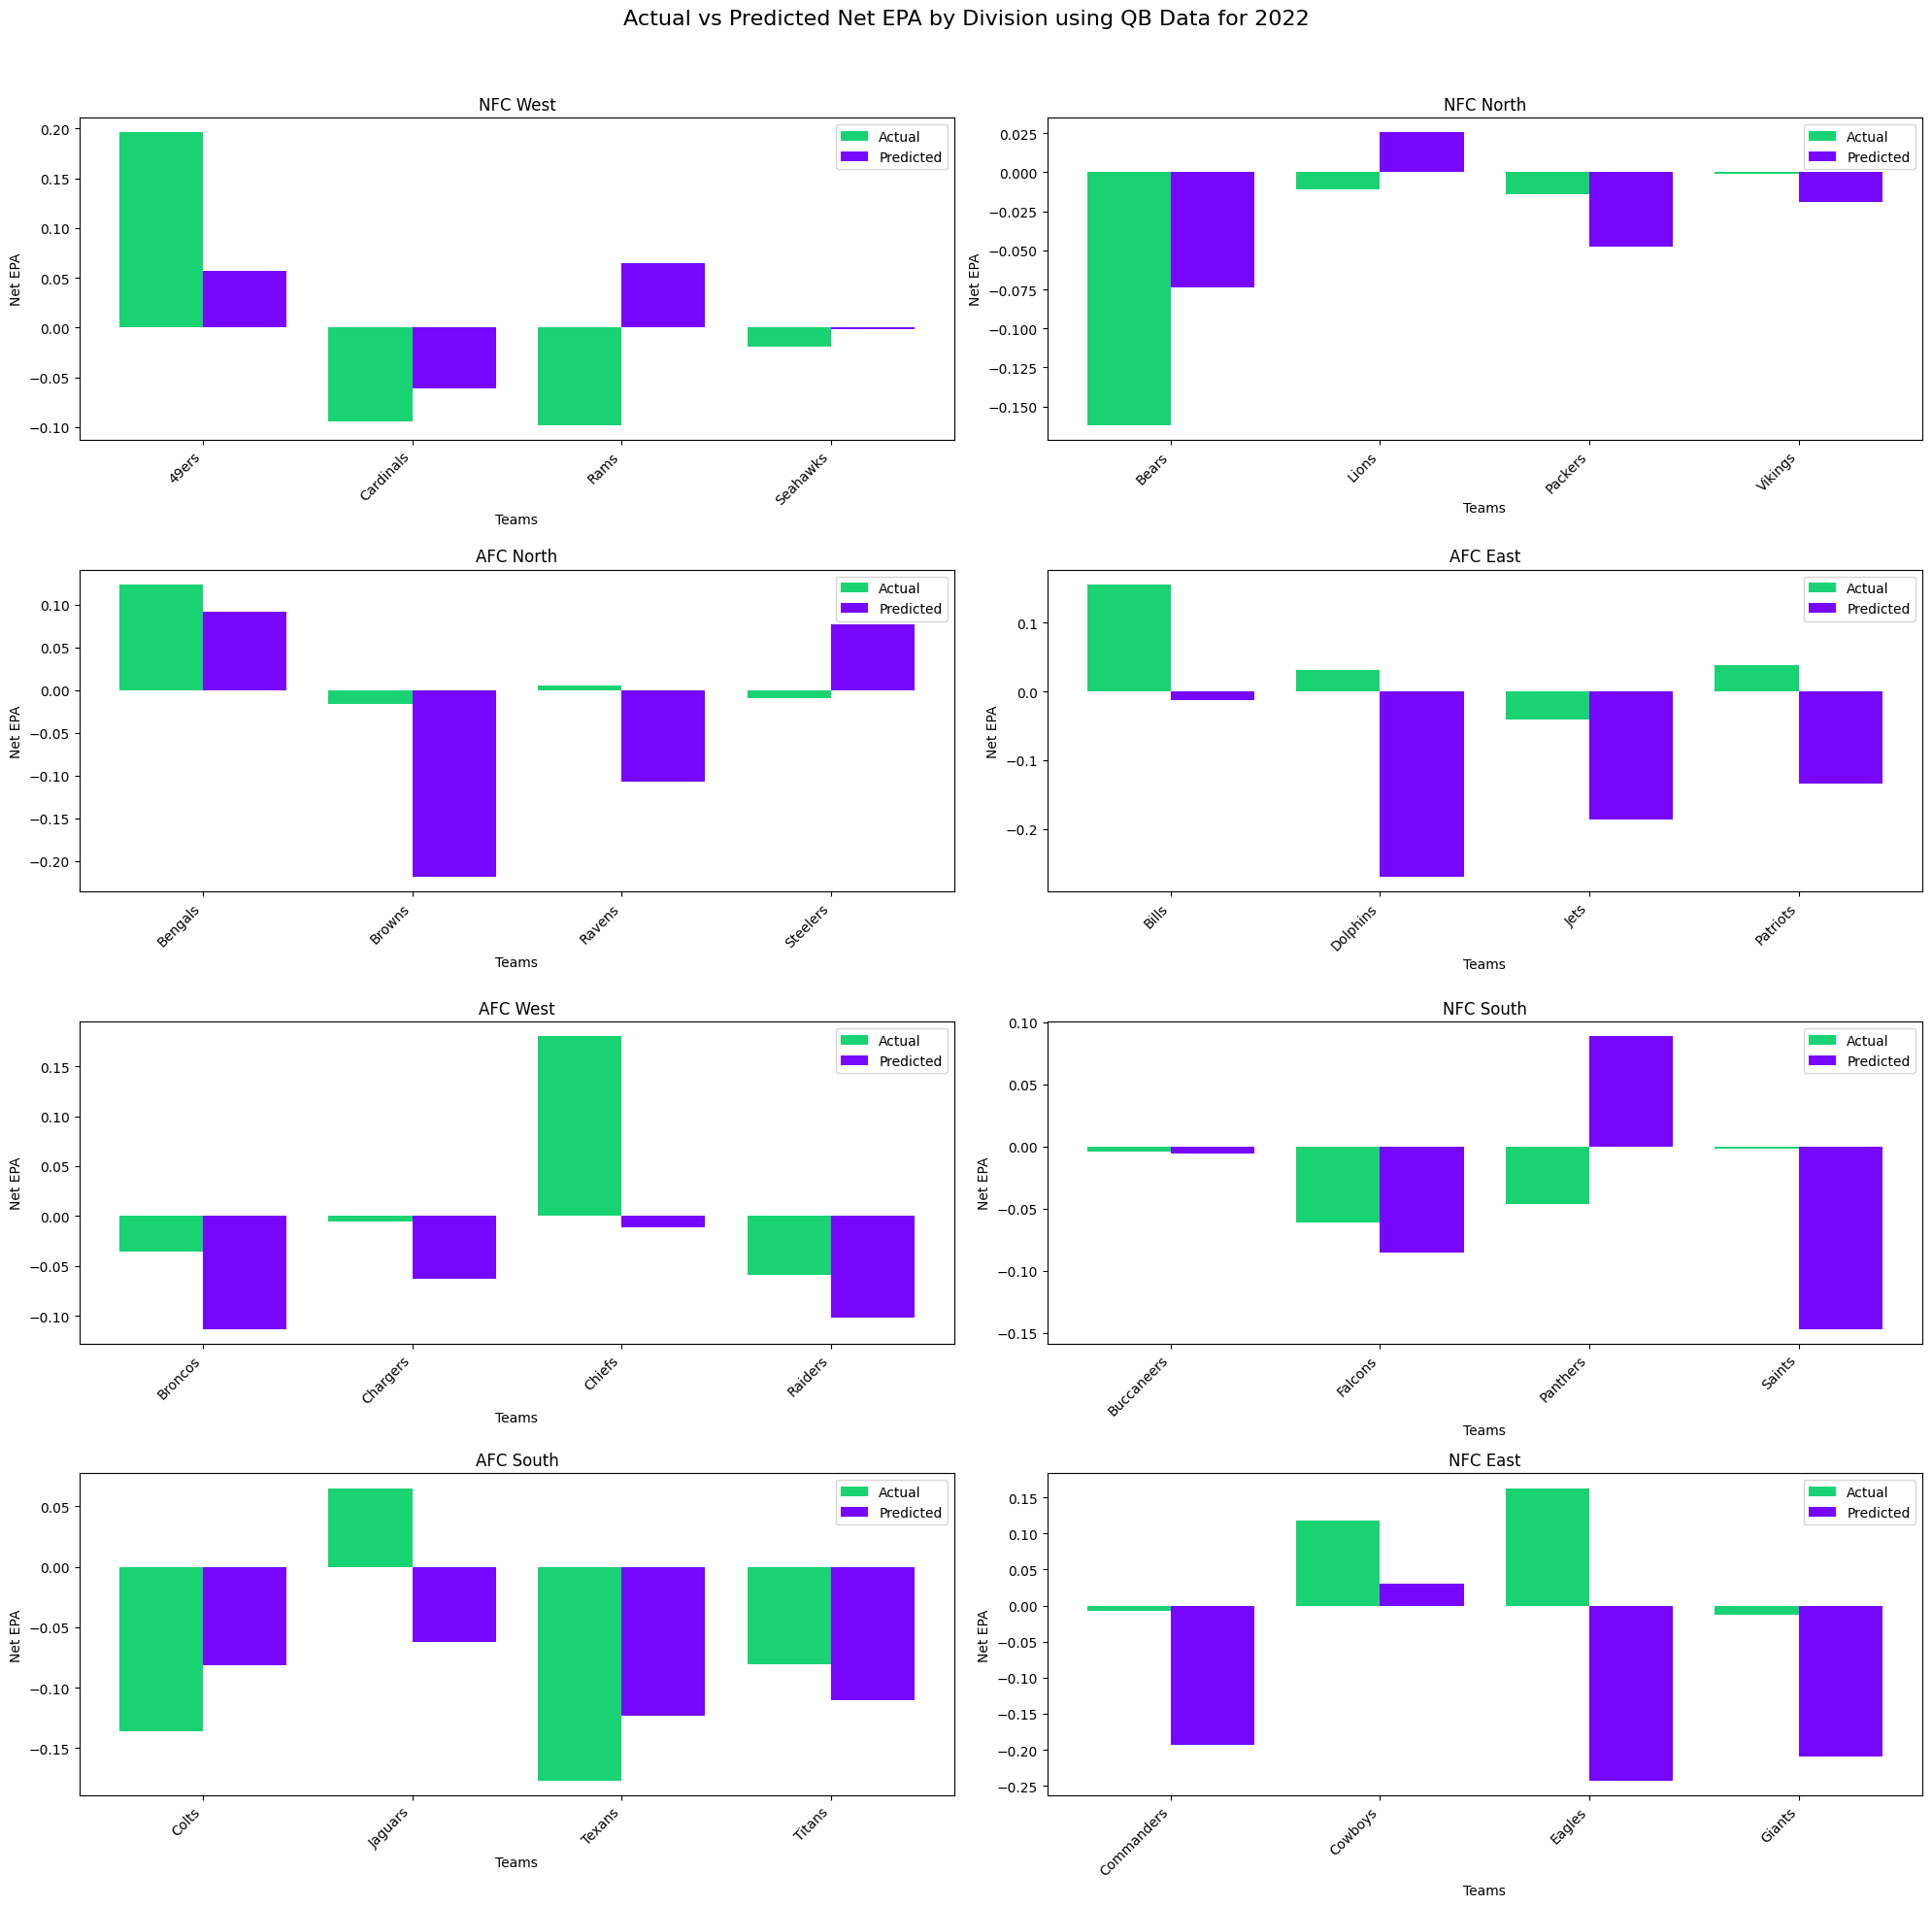

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0852 - val_loss: 0.0158
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0815 - val_loss: 0.0099
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0658 - val_loss: 0.0096
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0758 - val_loss: 0.0016
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0559 - val_loss: 0.0015
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0570 - val_loss: 0.0016
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0482 - val_loss: 0.0024
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0541 - val_loss: 0.0021
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0412 - val_loss: 0.0030
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0522 - val_loss: 0.0070


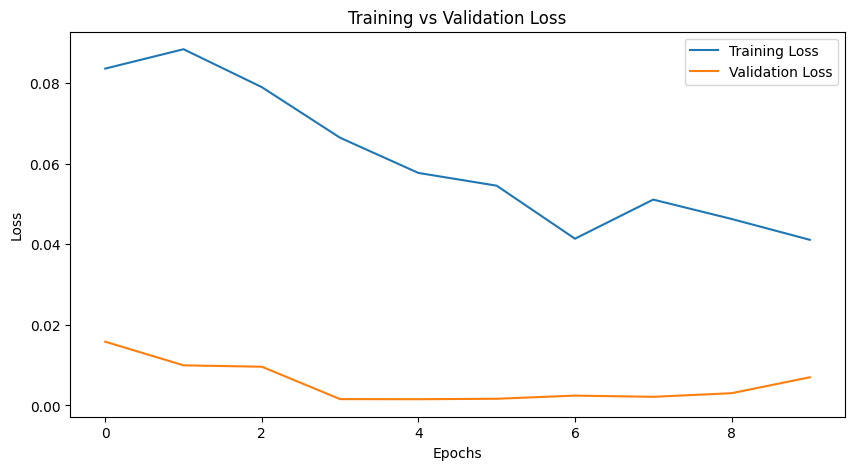

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
R² Score: -0.1009


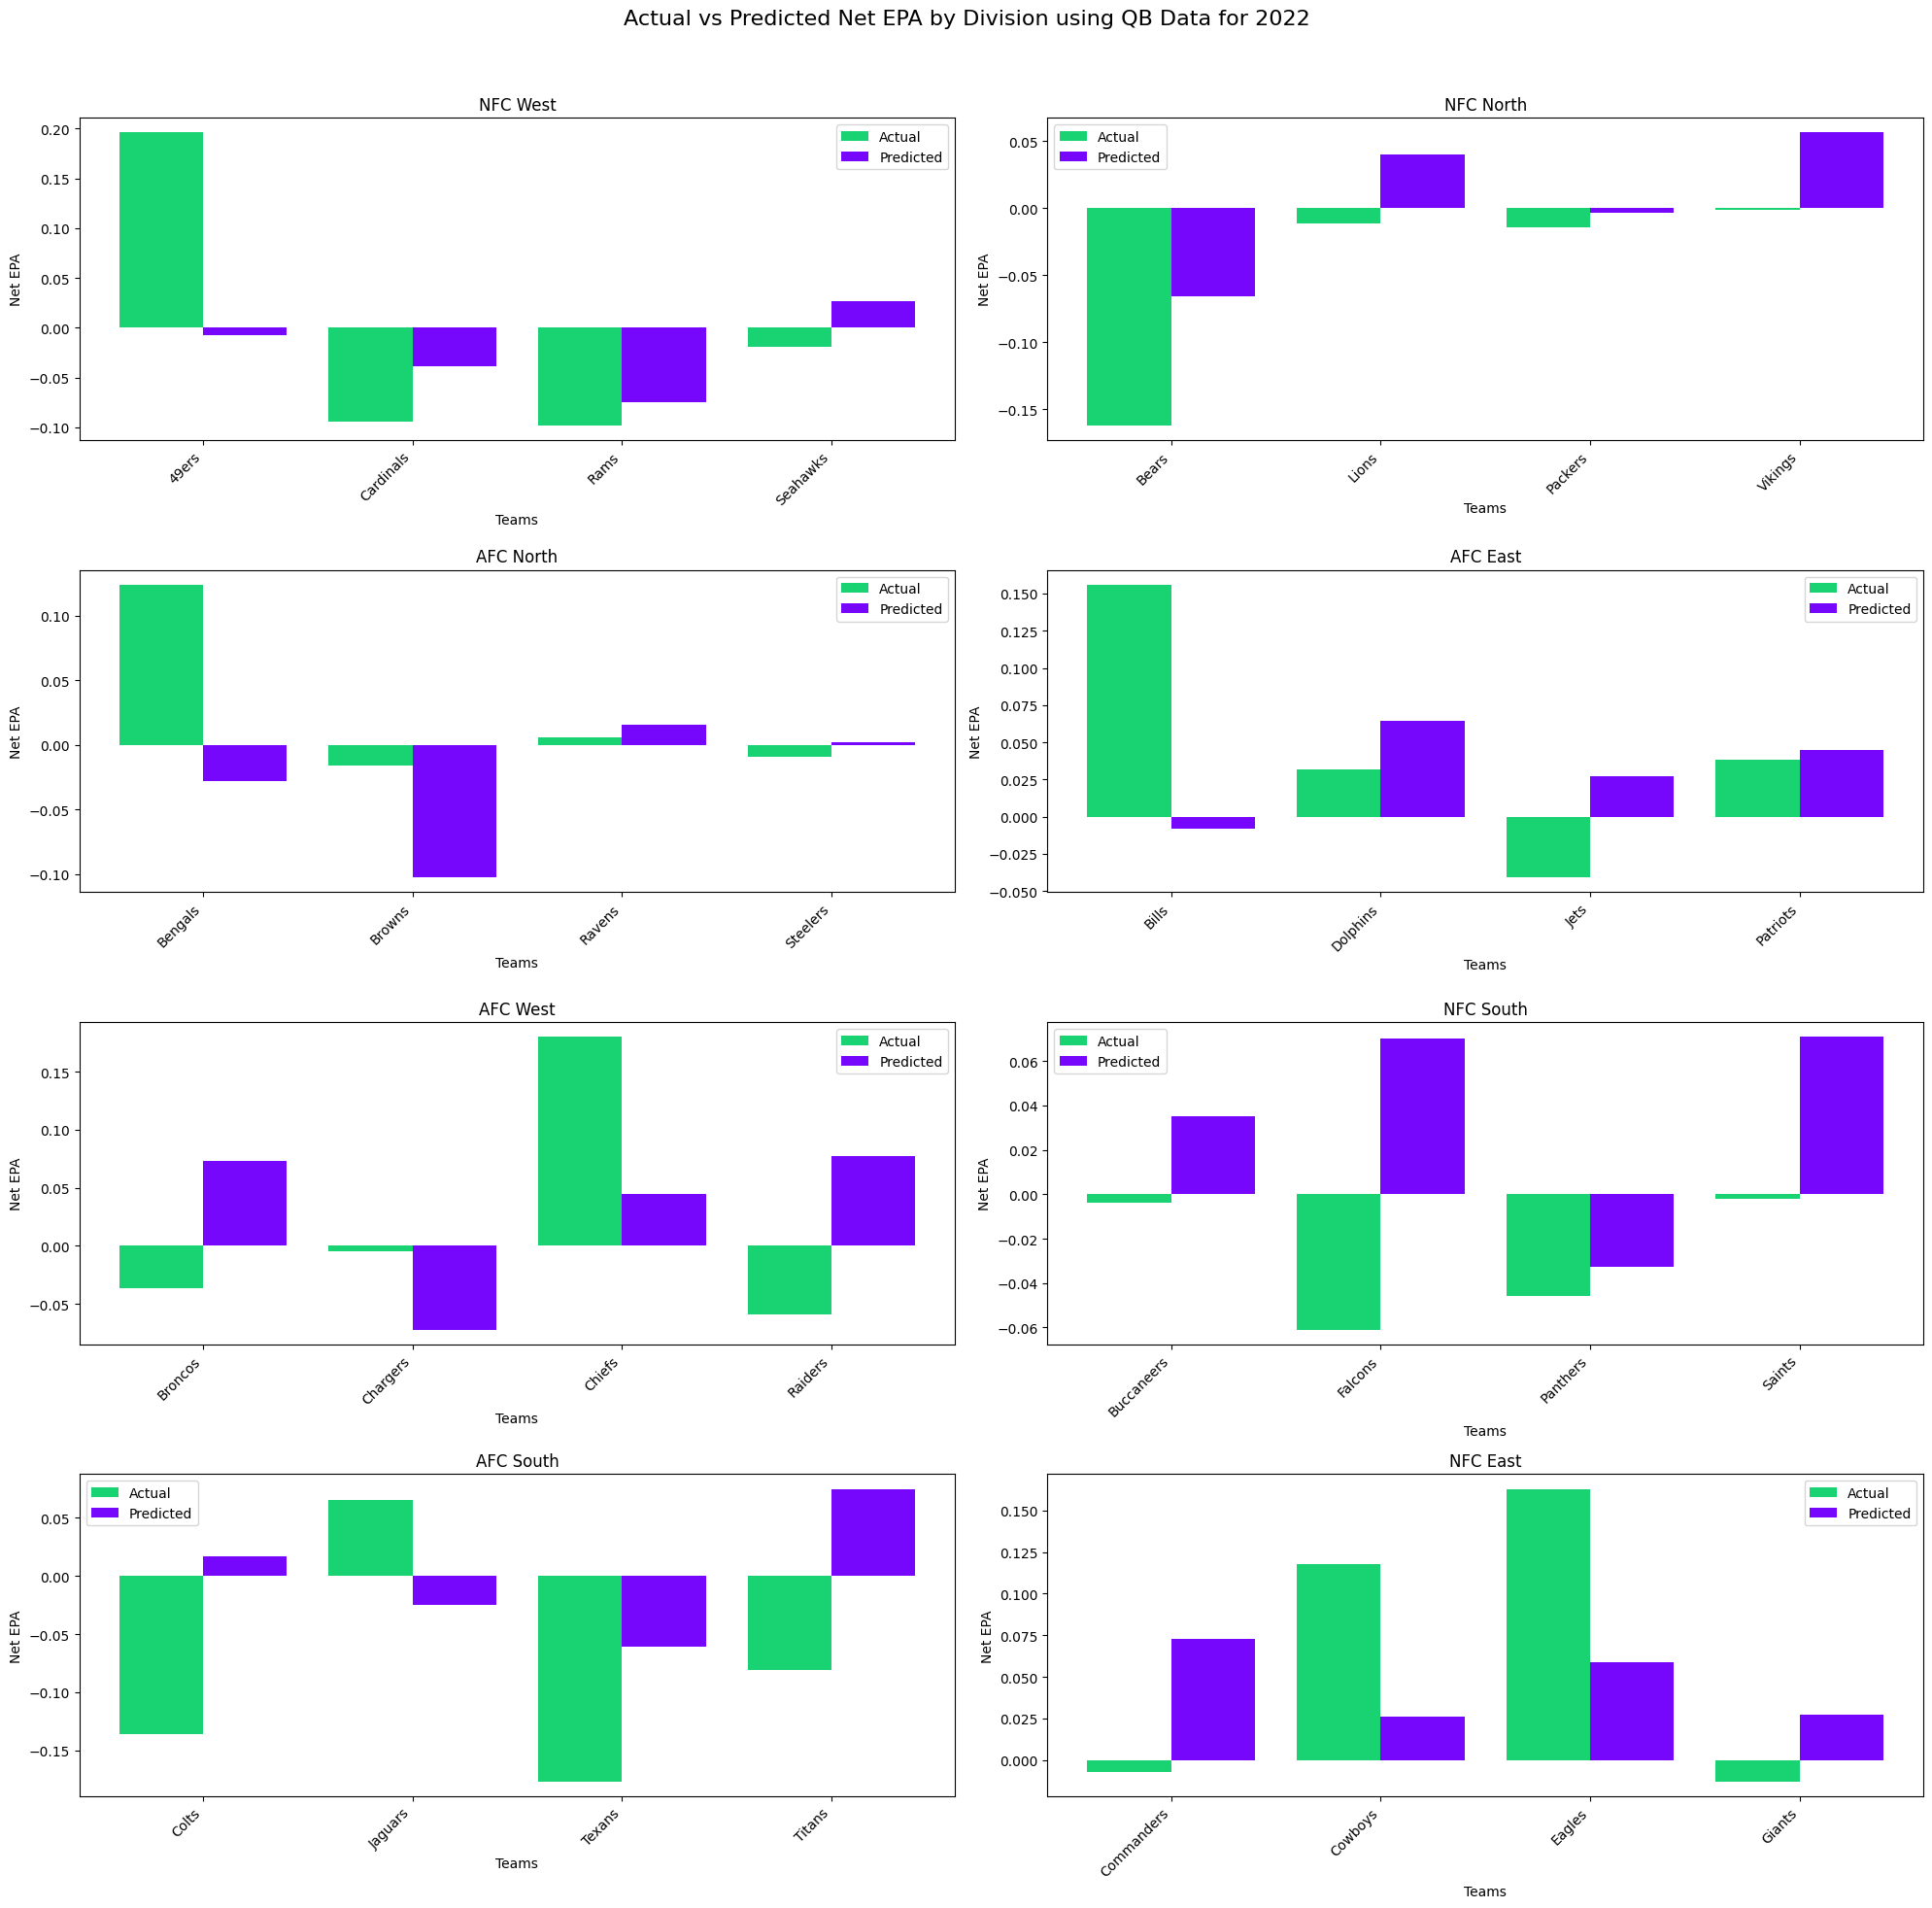

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0133 - val_loss: 0.0111
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0211 - val_loss: 0.0189
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0336 - val_loss: 0.0221
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0414 - val_loss: 0.0195
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0337 - val_loss: 0.0119
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0200 - val_loss: 0.0062
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0319 - val_loss: 0.0032
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0184 - val_loss: 0.0030
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242 - val_loss: 0.0029
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0234 - val_loss: 0.0026
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0121 - val_loss: 0.0038
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - val_loss: 0.0044
E

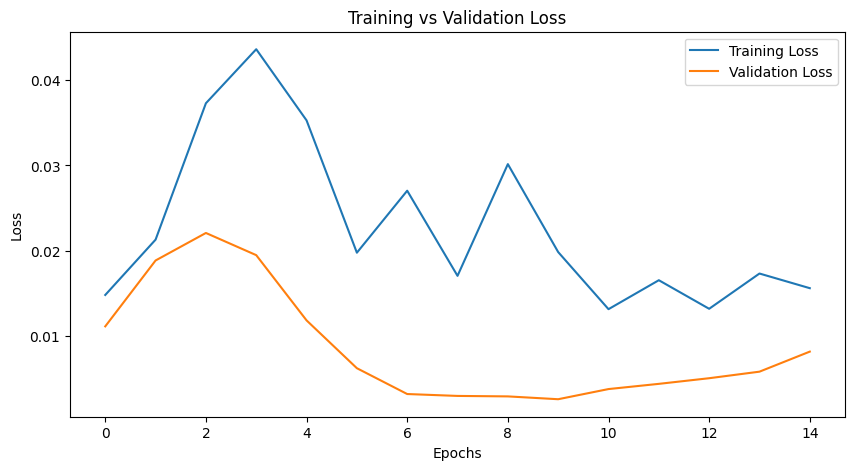

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R² Score: 0.2262


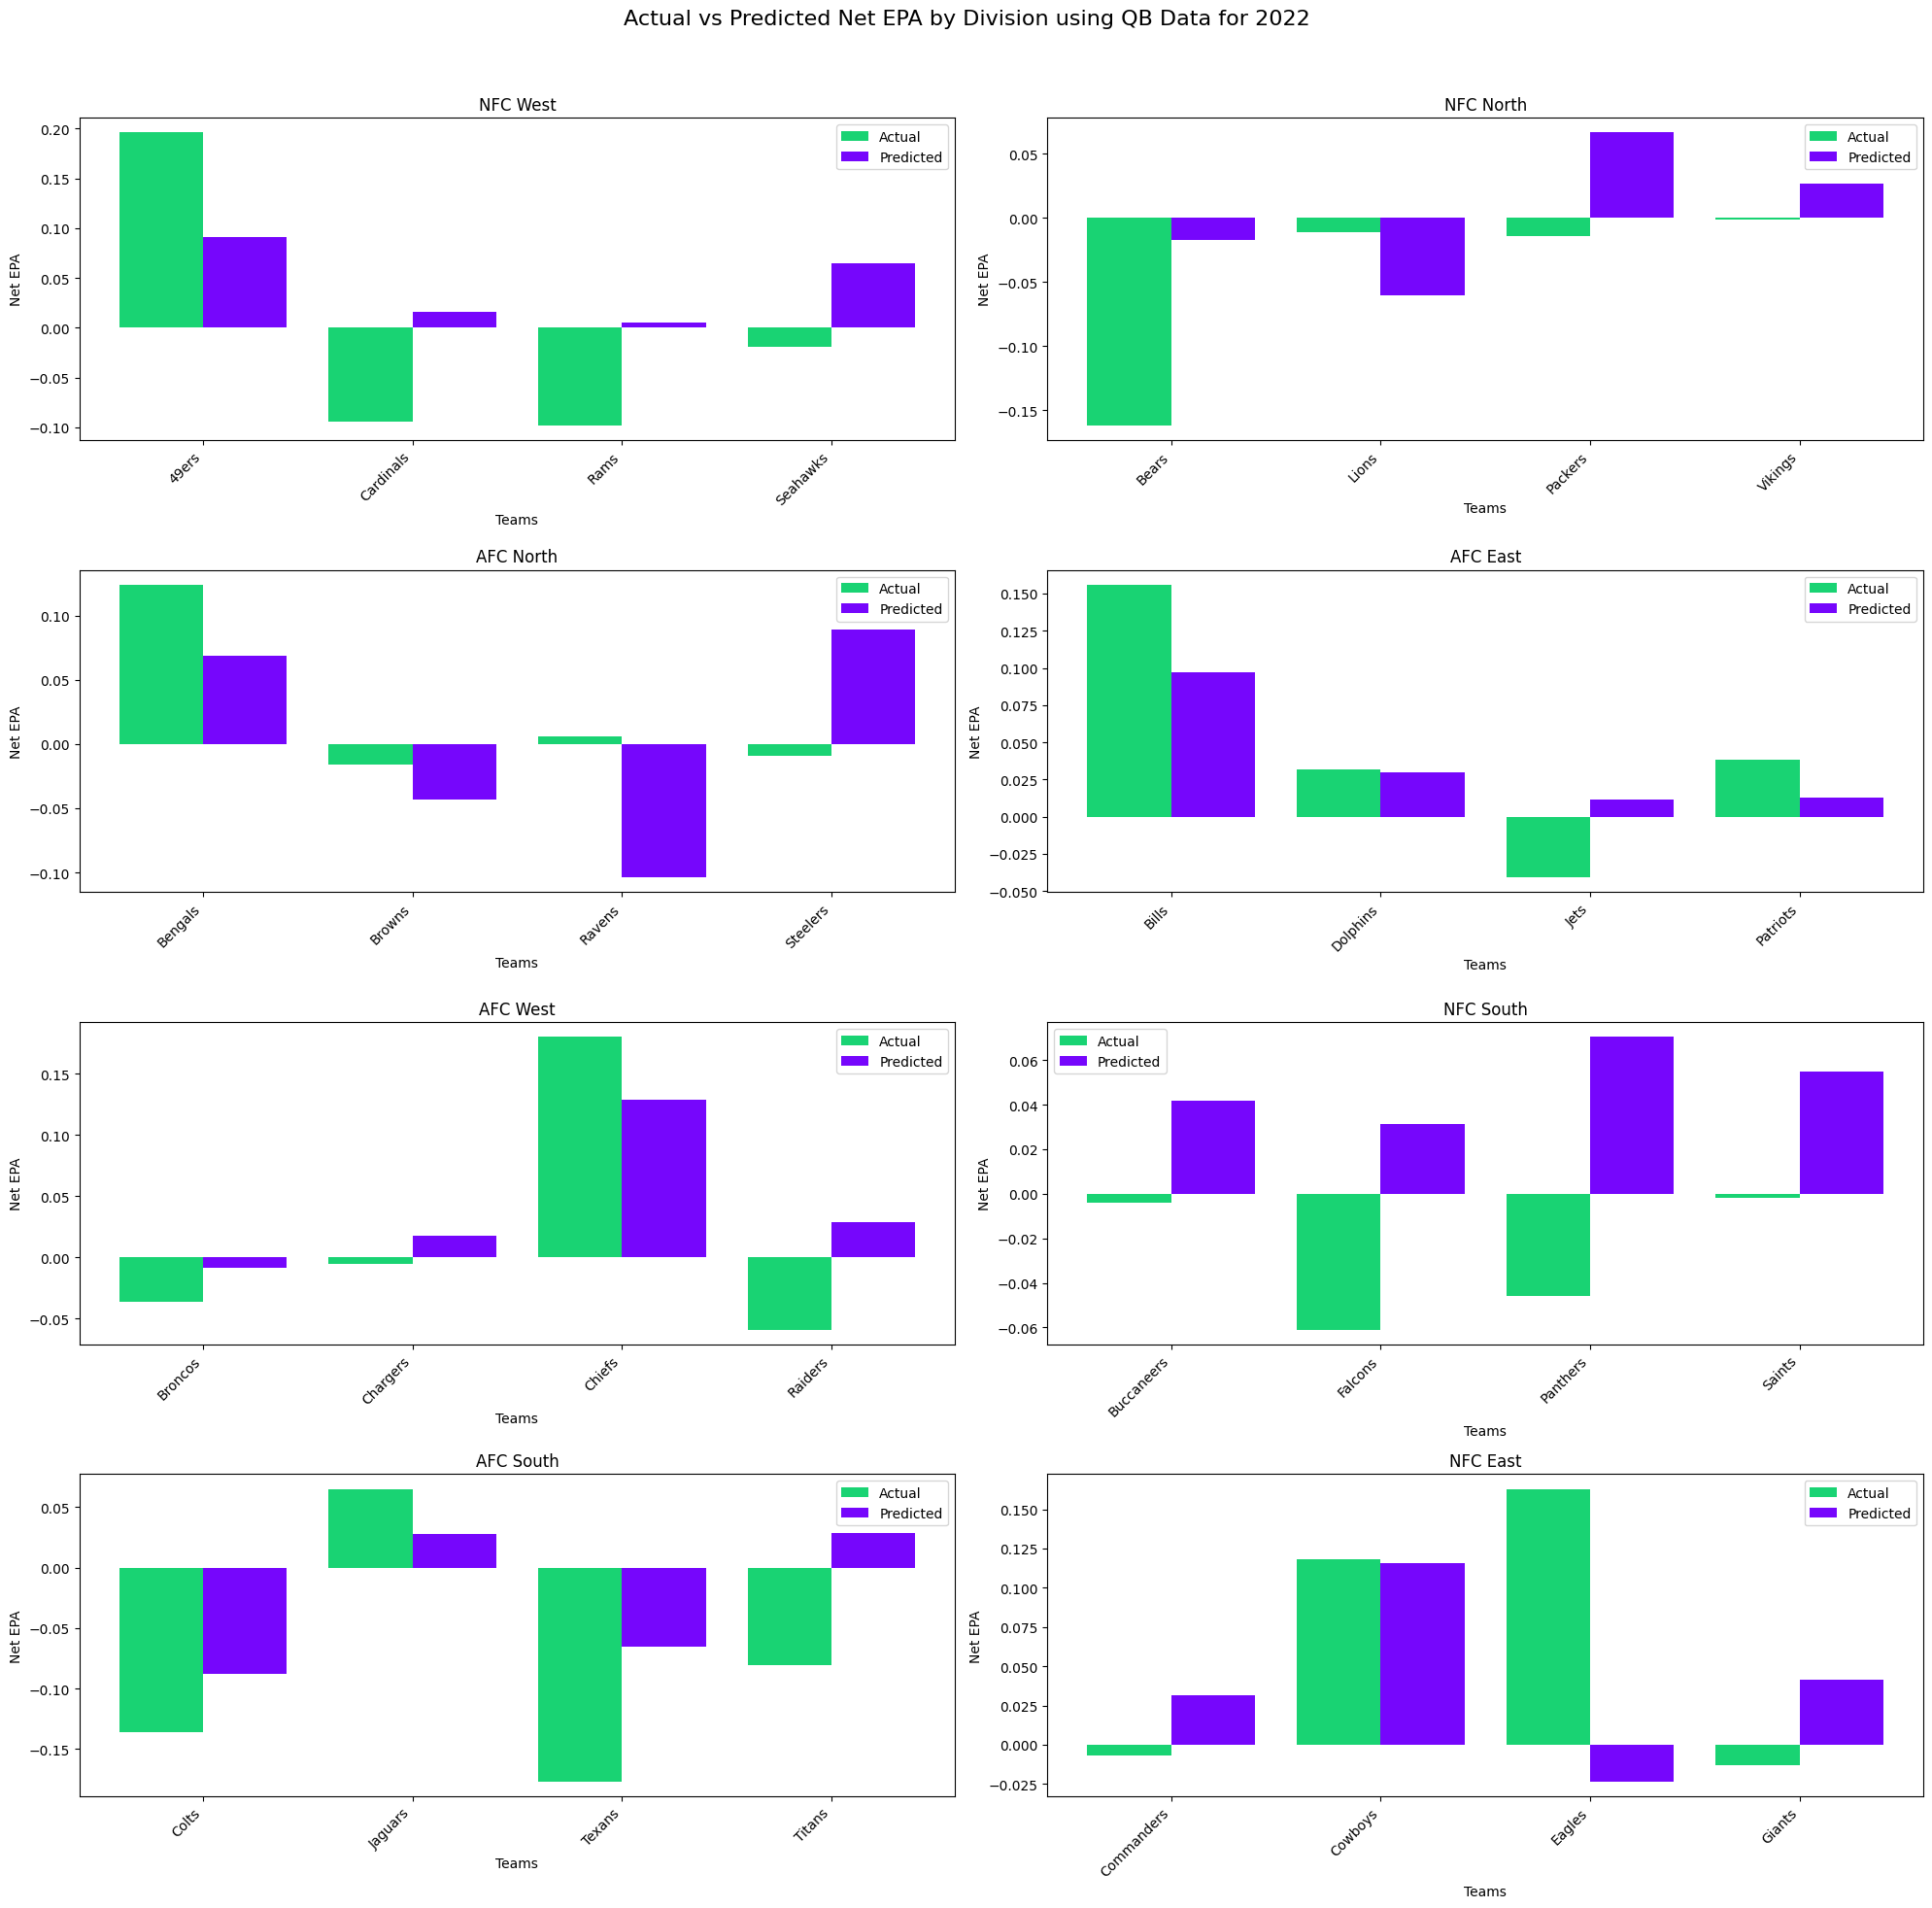

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - val_loss: 0.0088
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0183 - val_loss: 0.0077
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0070
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109 - val_loss: 0.0080
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127 - val_loss: 0.0097
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - val_loss: 0.0097
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - val_loss: 0.0085
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - val_loss: 0.0064
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0132 - val_loss: 0.0057
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - val_loss: 0.0063
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0148 - val_loss: 0.0061
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - val_loss: 0.0065
Ep

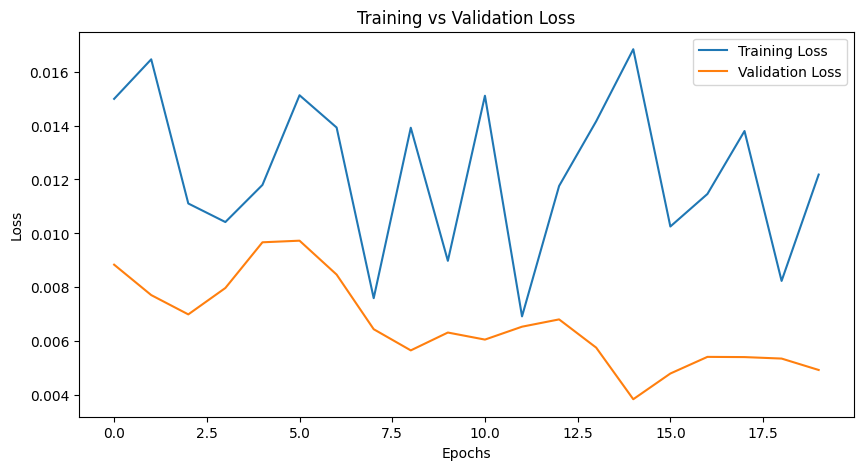

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
R² Score: 0.3321


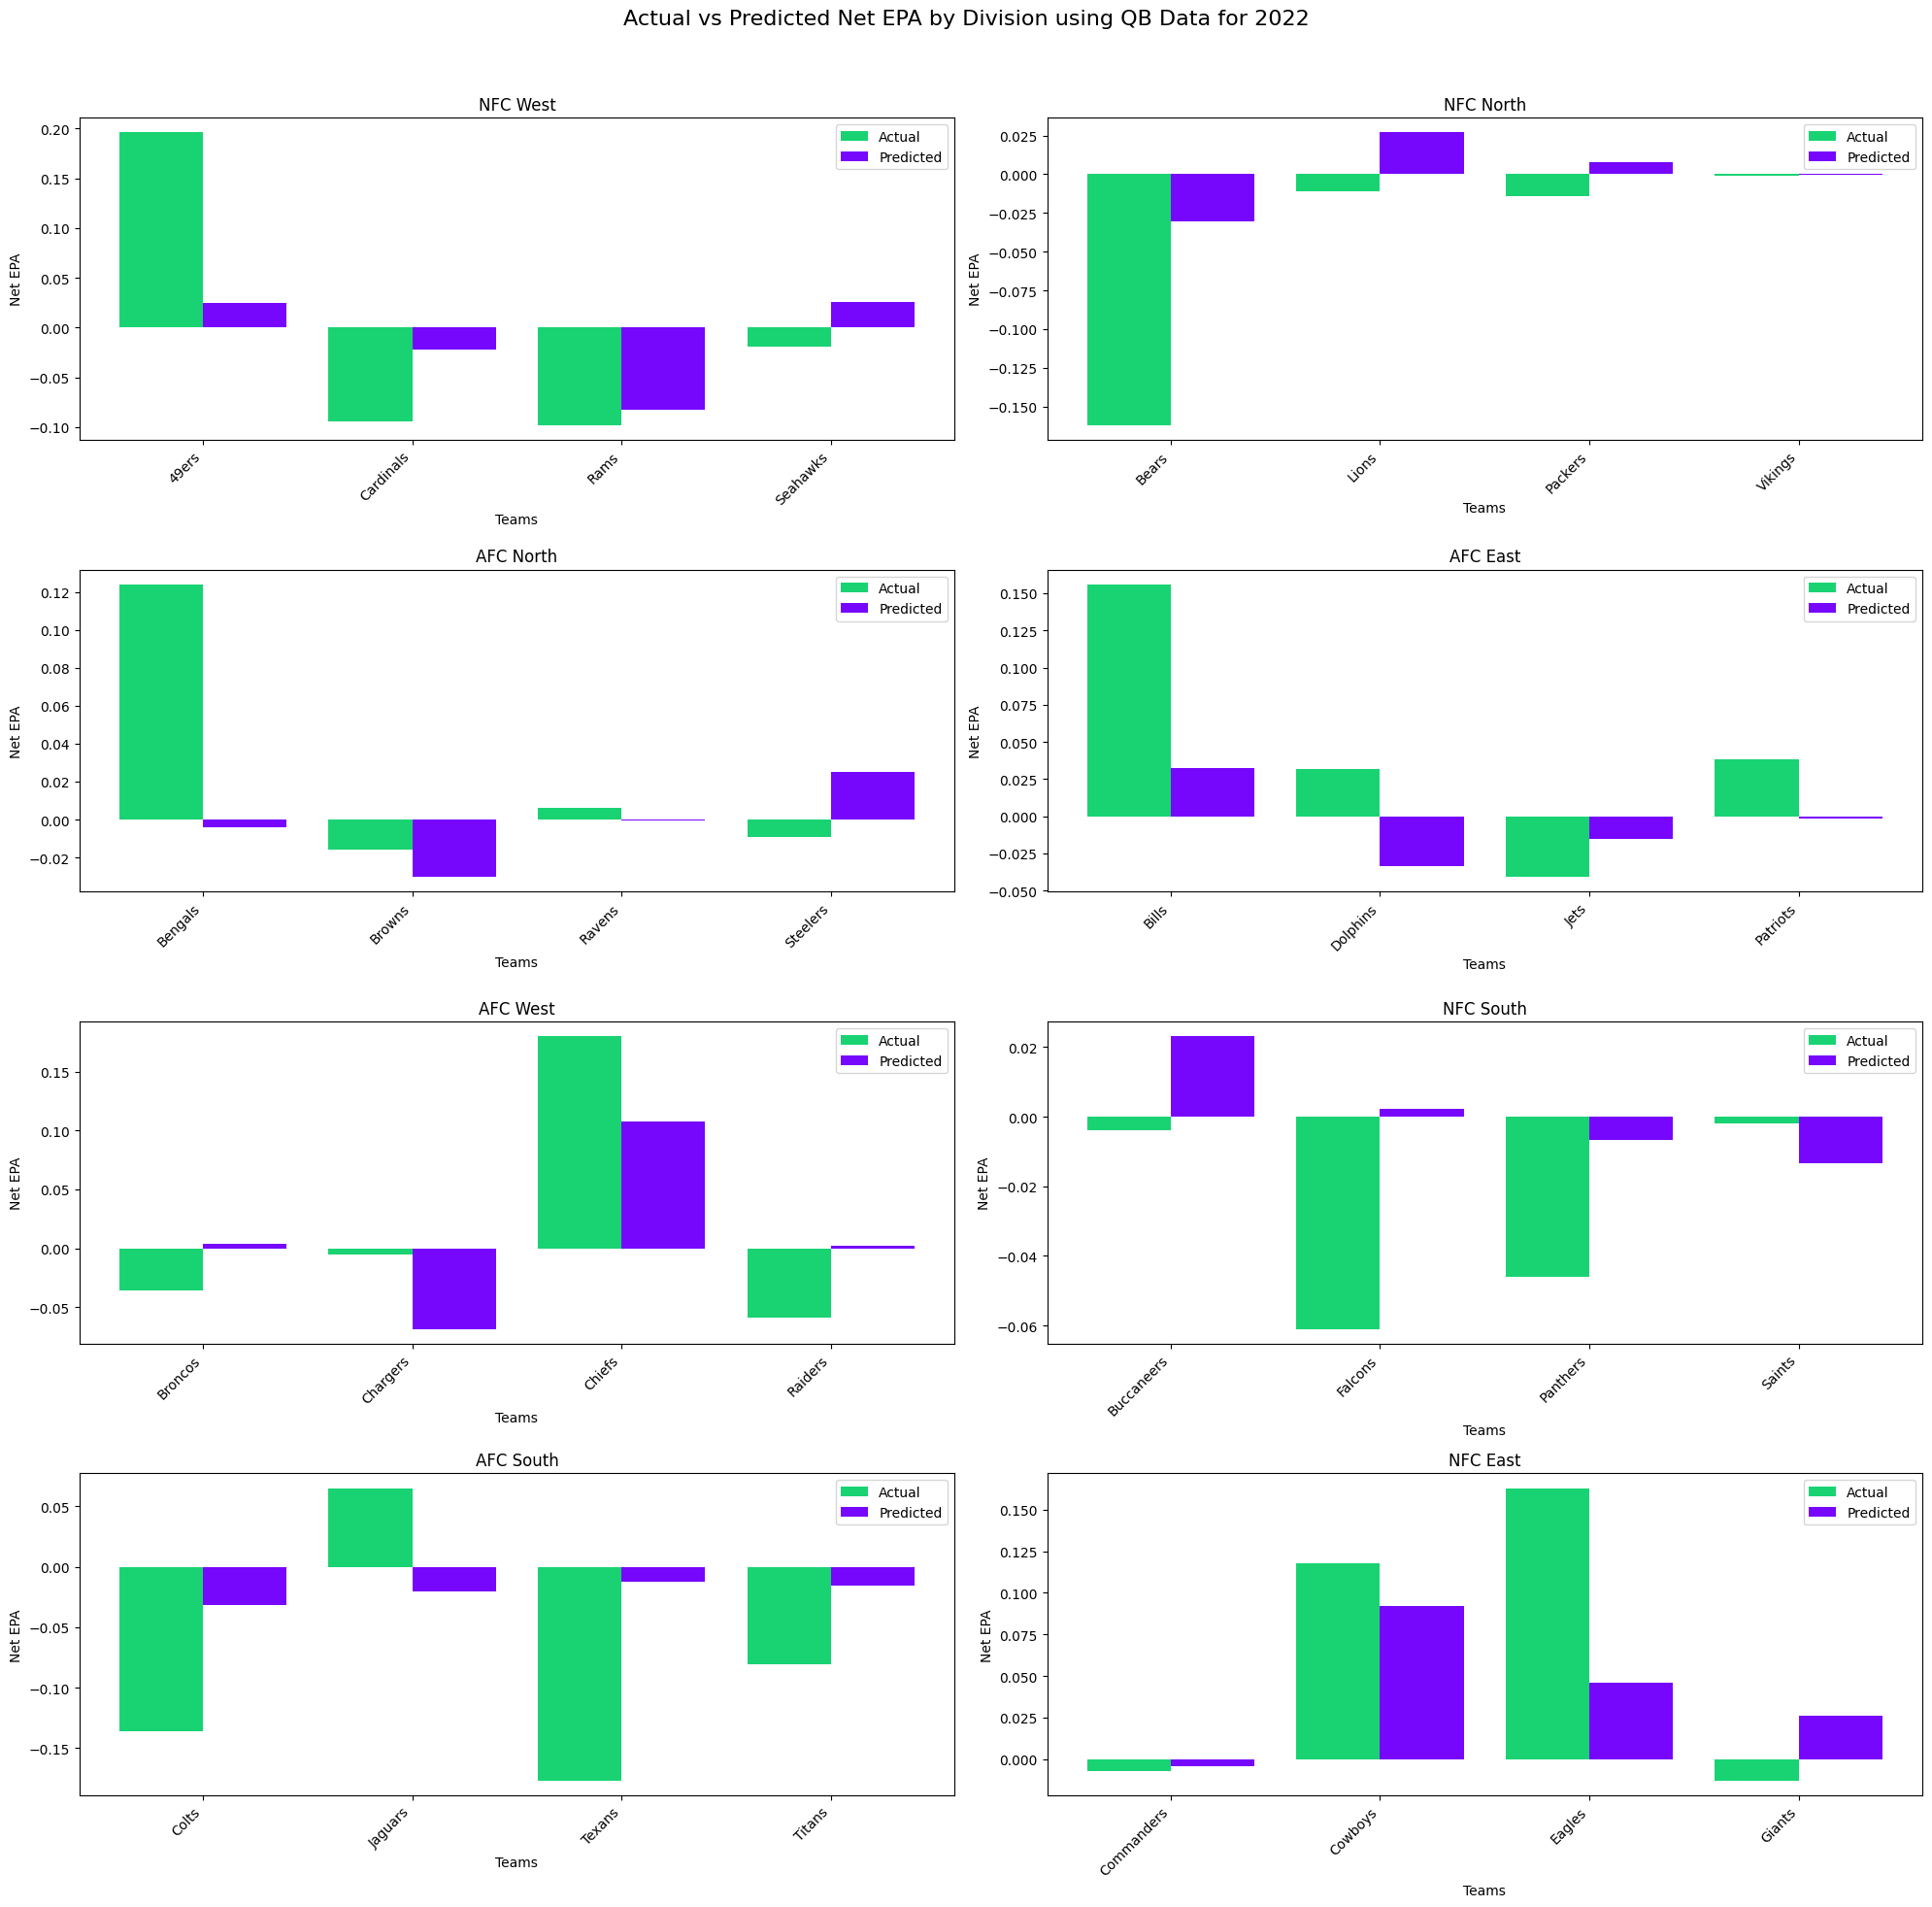

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100 - val_loss: 0.0046
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - val_loss: 0.0061
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0110 - val_loss: 0.0128
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - val_loss: 0.0113
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - val_loss: 0.0088
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0132 - val_loss: 0.0097
Epo

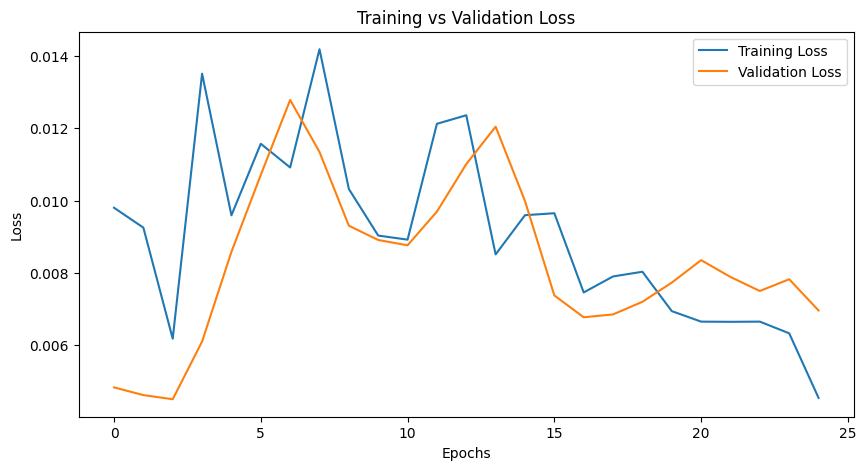

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
R² Score: 0.4758


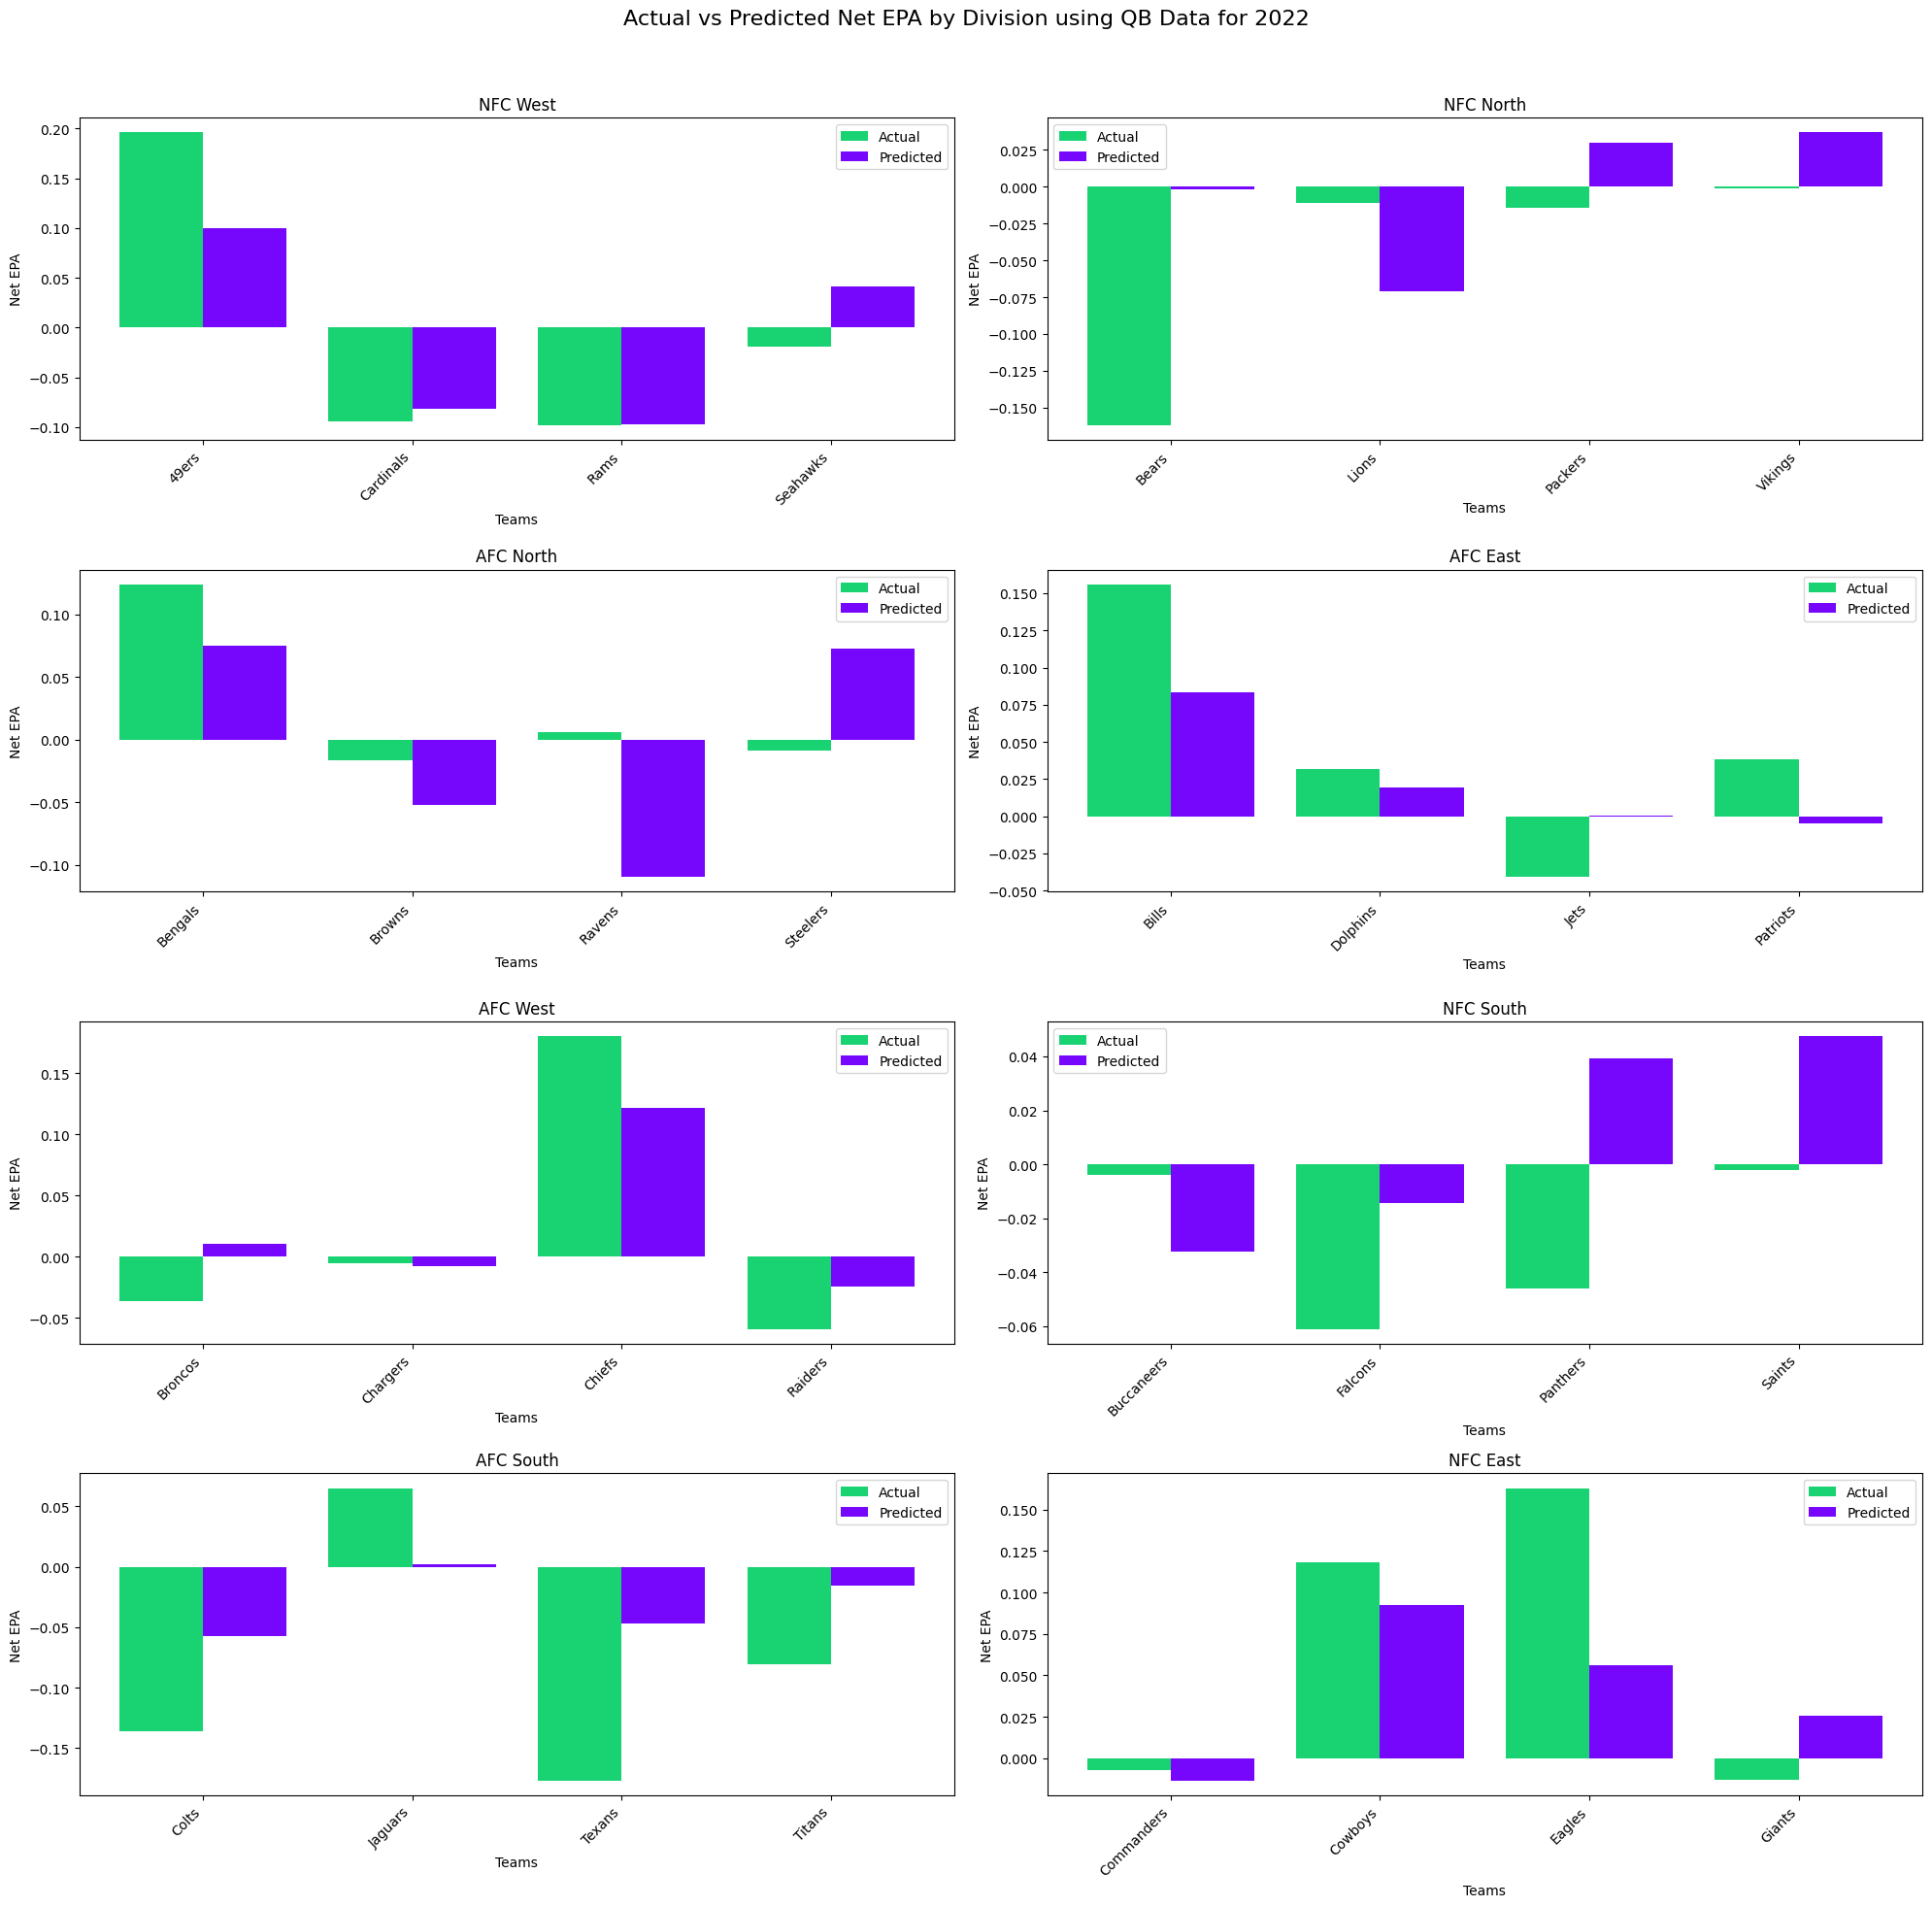

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0085
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083 - val_loss: 0.0104
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - val_loss: 0.0102
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - val_loss: 0.0102
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - val_loss: 0.0106
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - val_loss: 0.0064
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0056
Ep

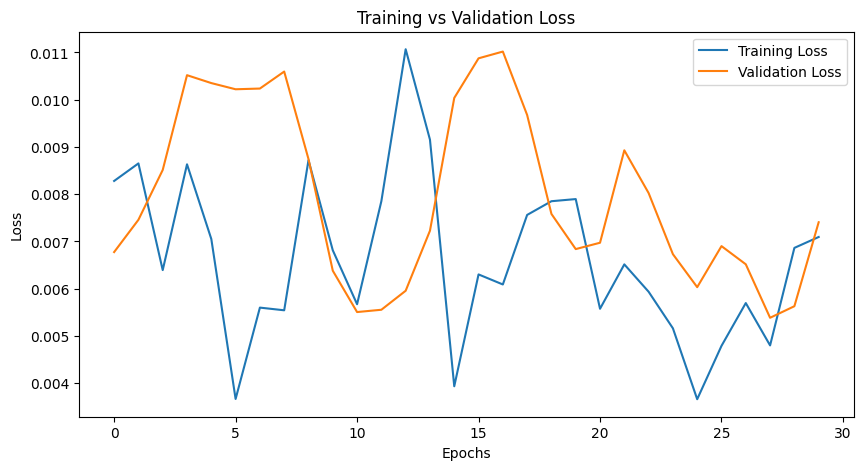

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
R² Score: 0.3615


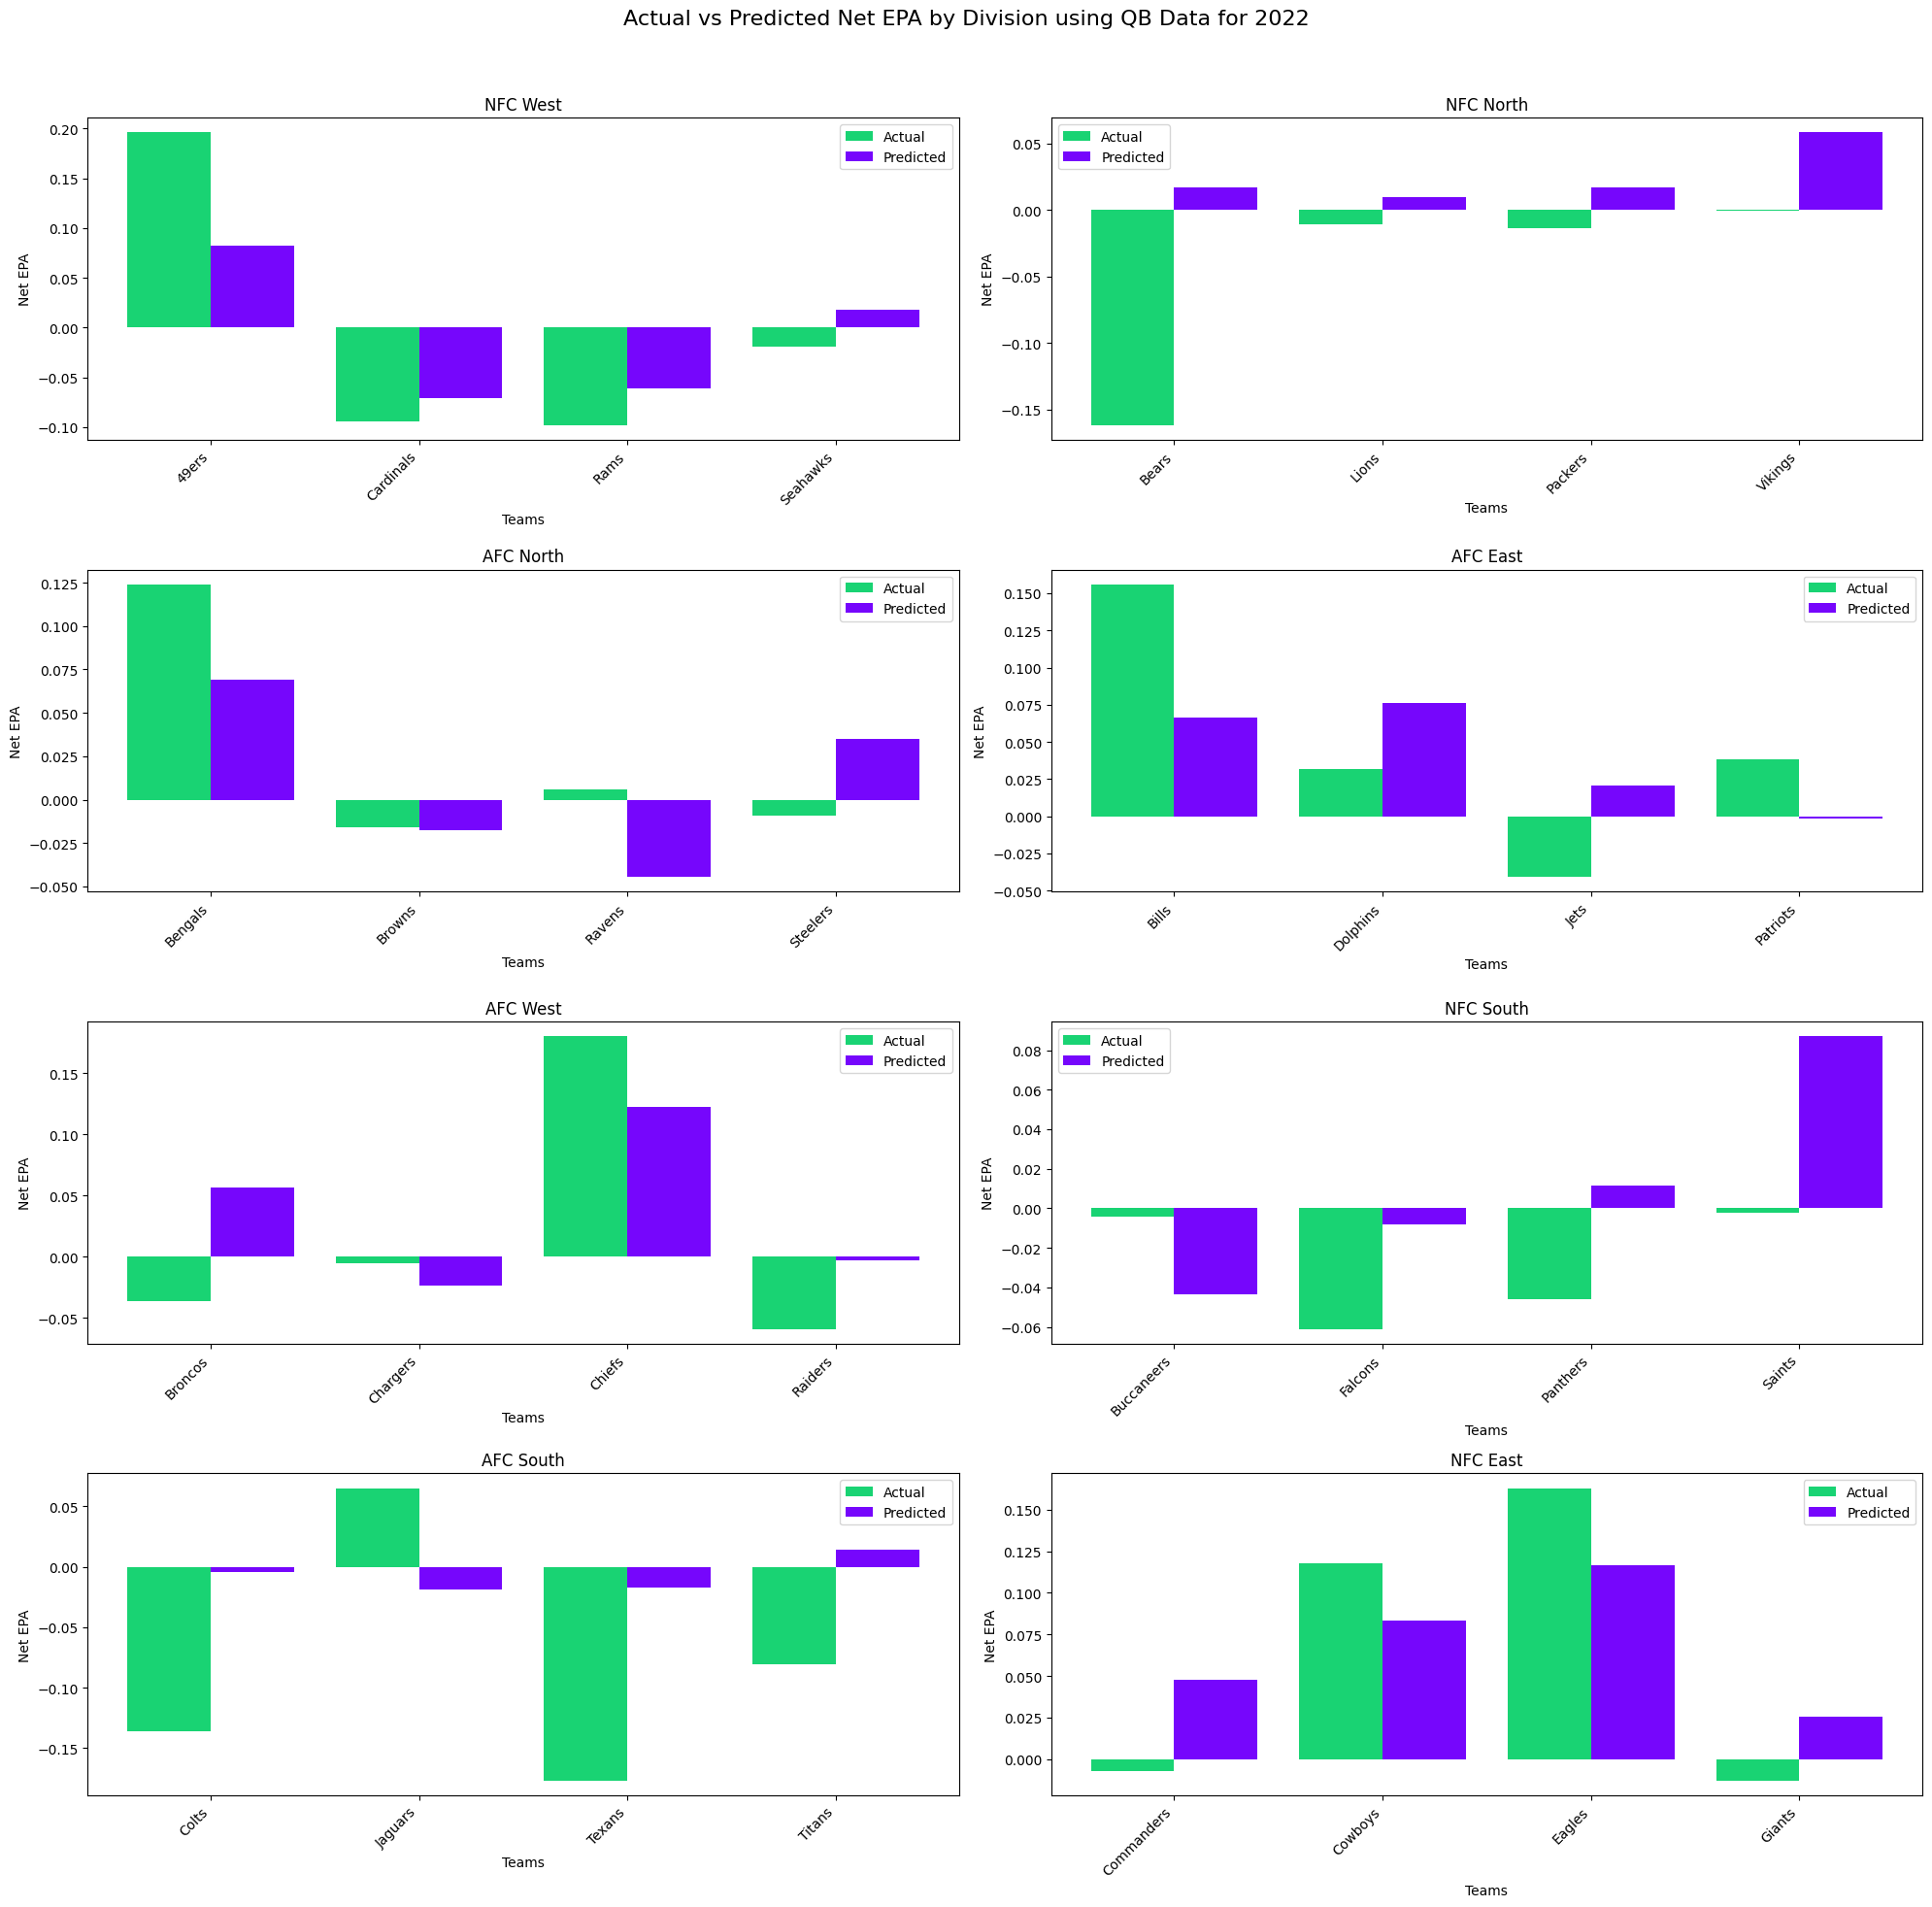

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053 - val_loss: 0.0089
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - val_loss: 0.0102
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071 - val_loss: 0.0089
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - val_loss: 0.0053
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0085 - val_loss: 0.0062
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - val_loss: 0.0076
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - val_loss: 0.0074
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070 - val_loss: 0.0048
Epoc

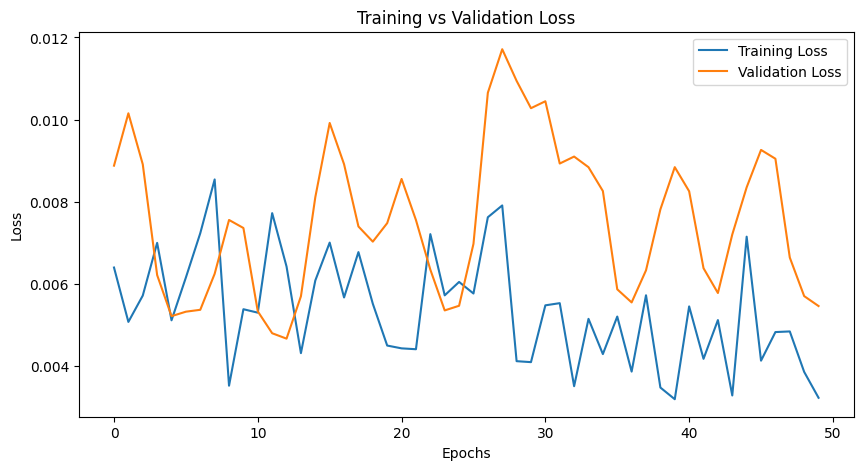

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
R² Score: 0.4954


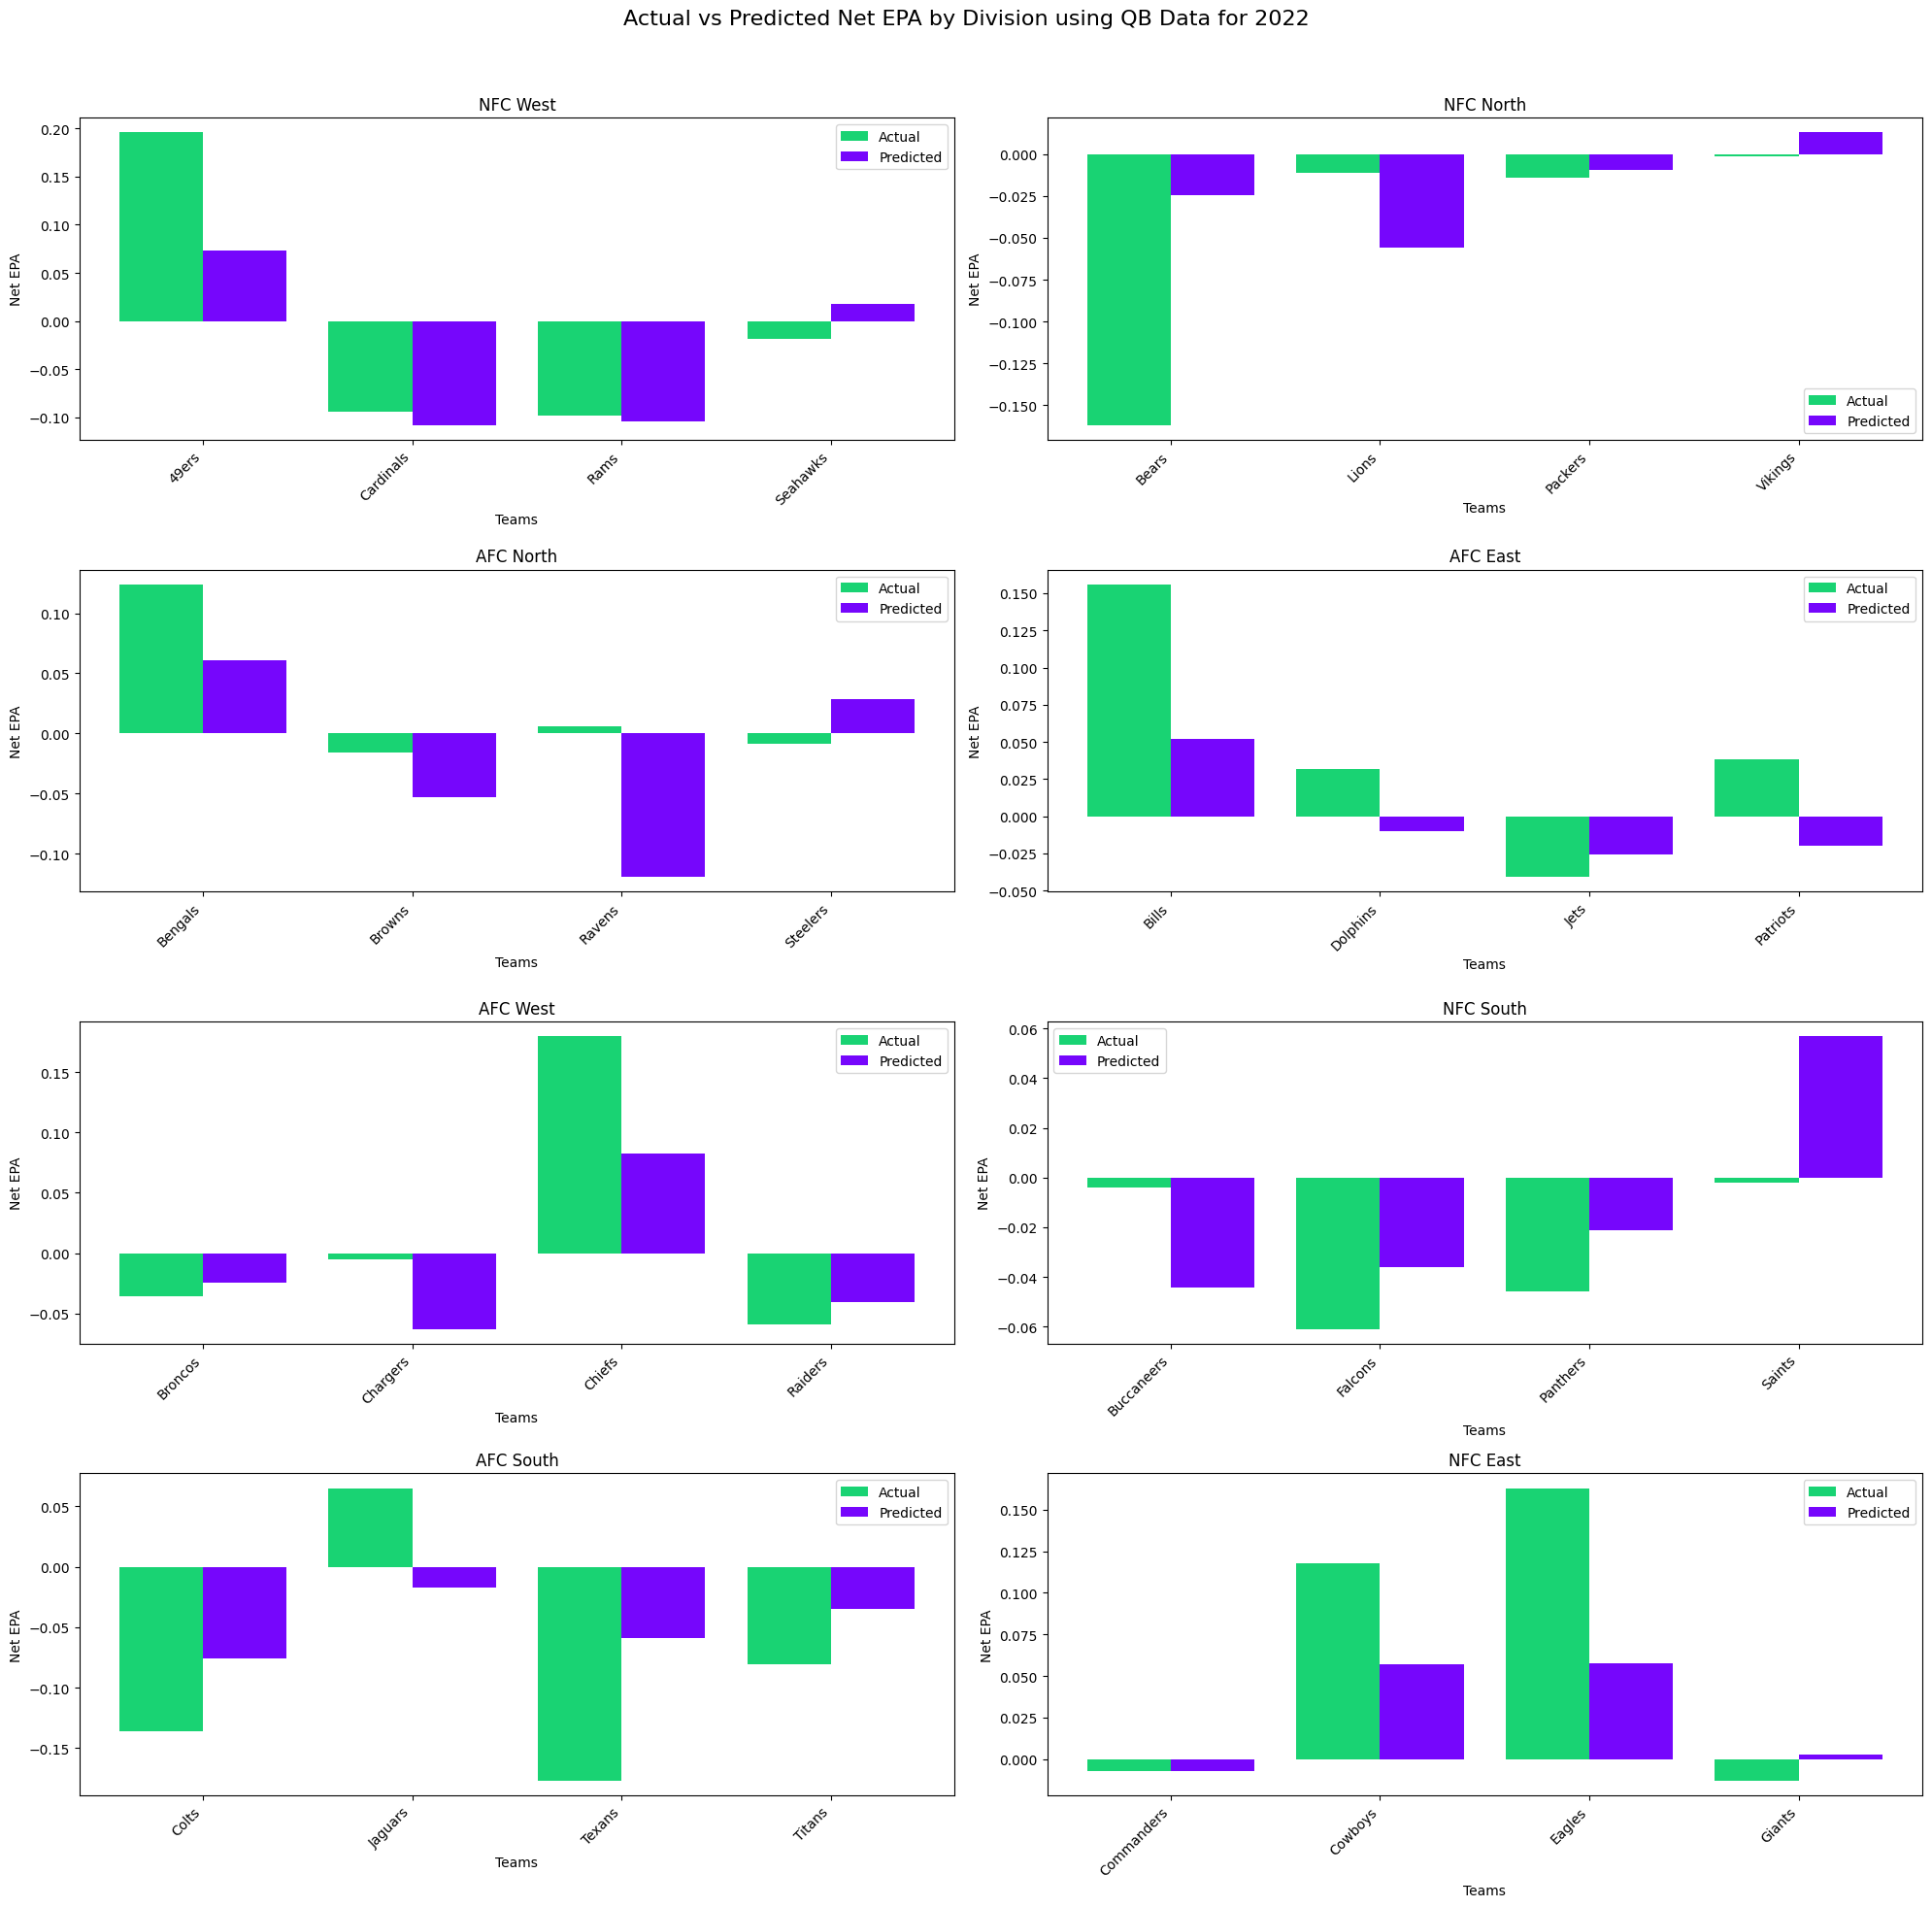

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046 - val_loss: 0.0058
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - val_loss: 0.0075
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - val_loss: 0.0084
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032 - val_loss: 0.0081
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039 - val_loss: 0.0061
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - val_loss: 0.0076
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - val_loss: 0.0091
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - val_loss: 0.0094
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - val_loss: 0.0073
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039 - val_lo

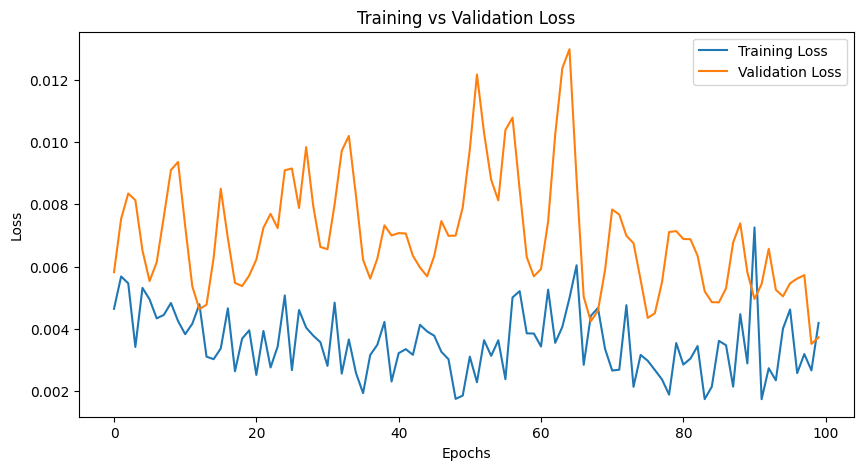

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
R² Score: 0.6688


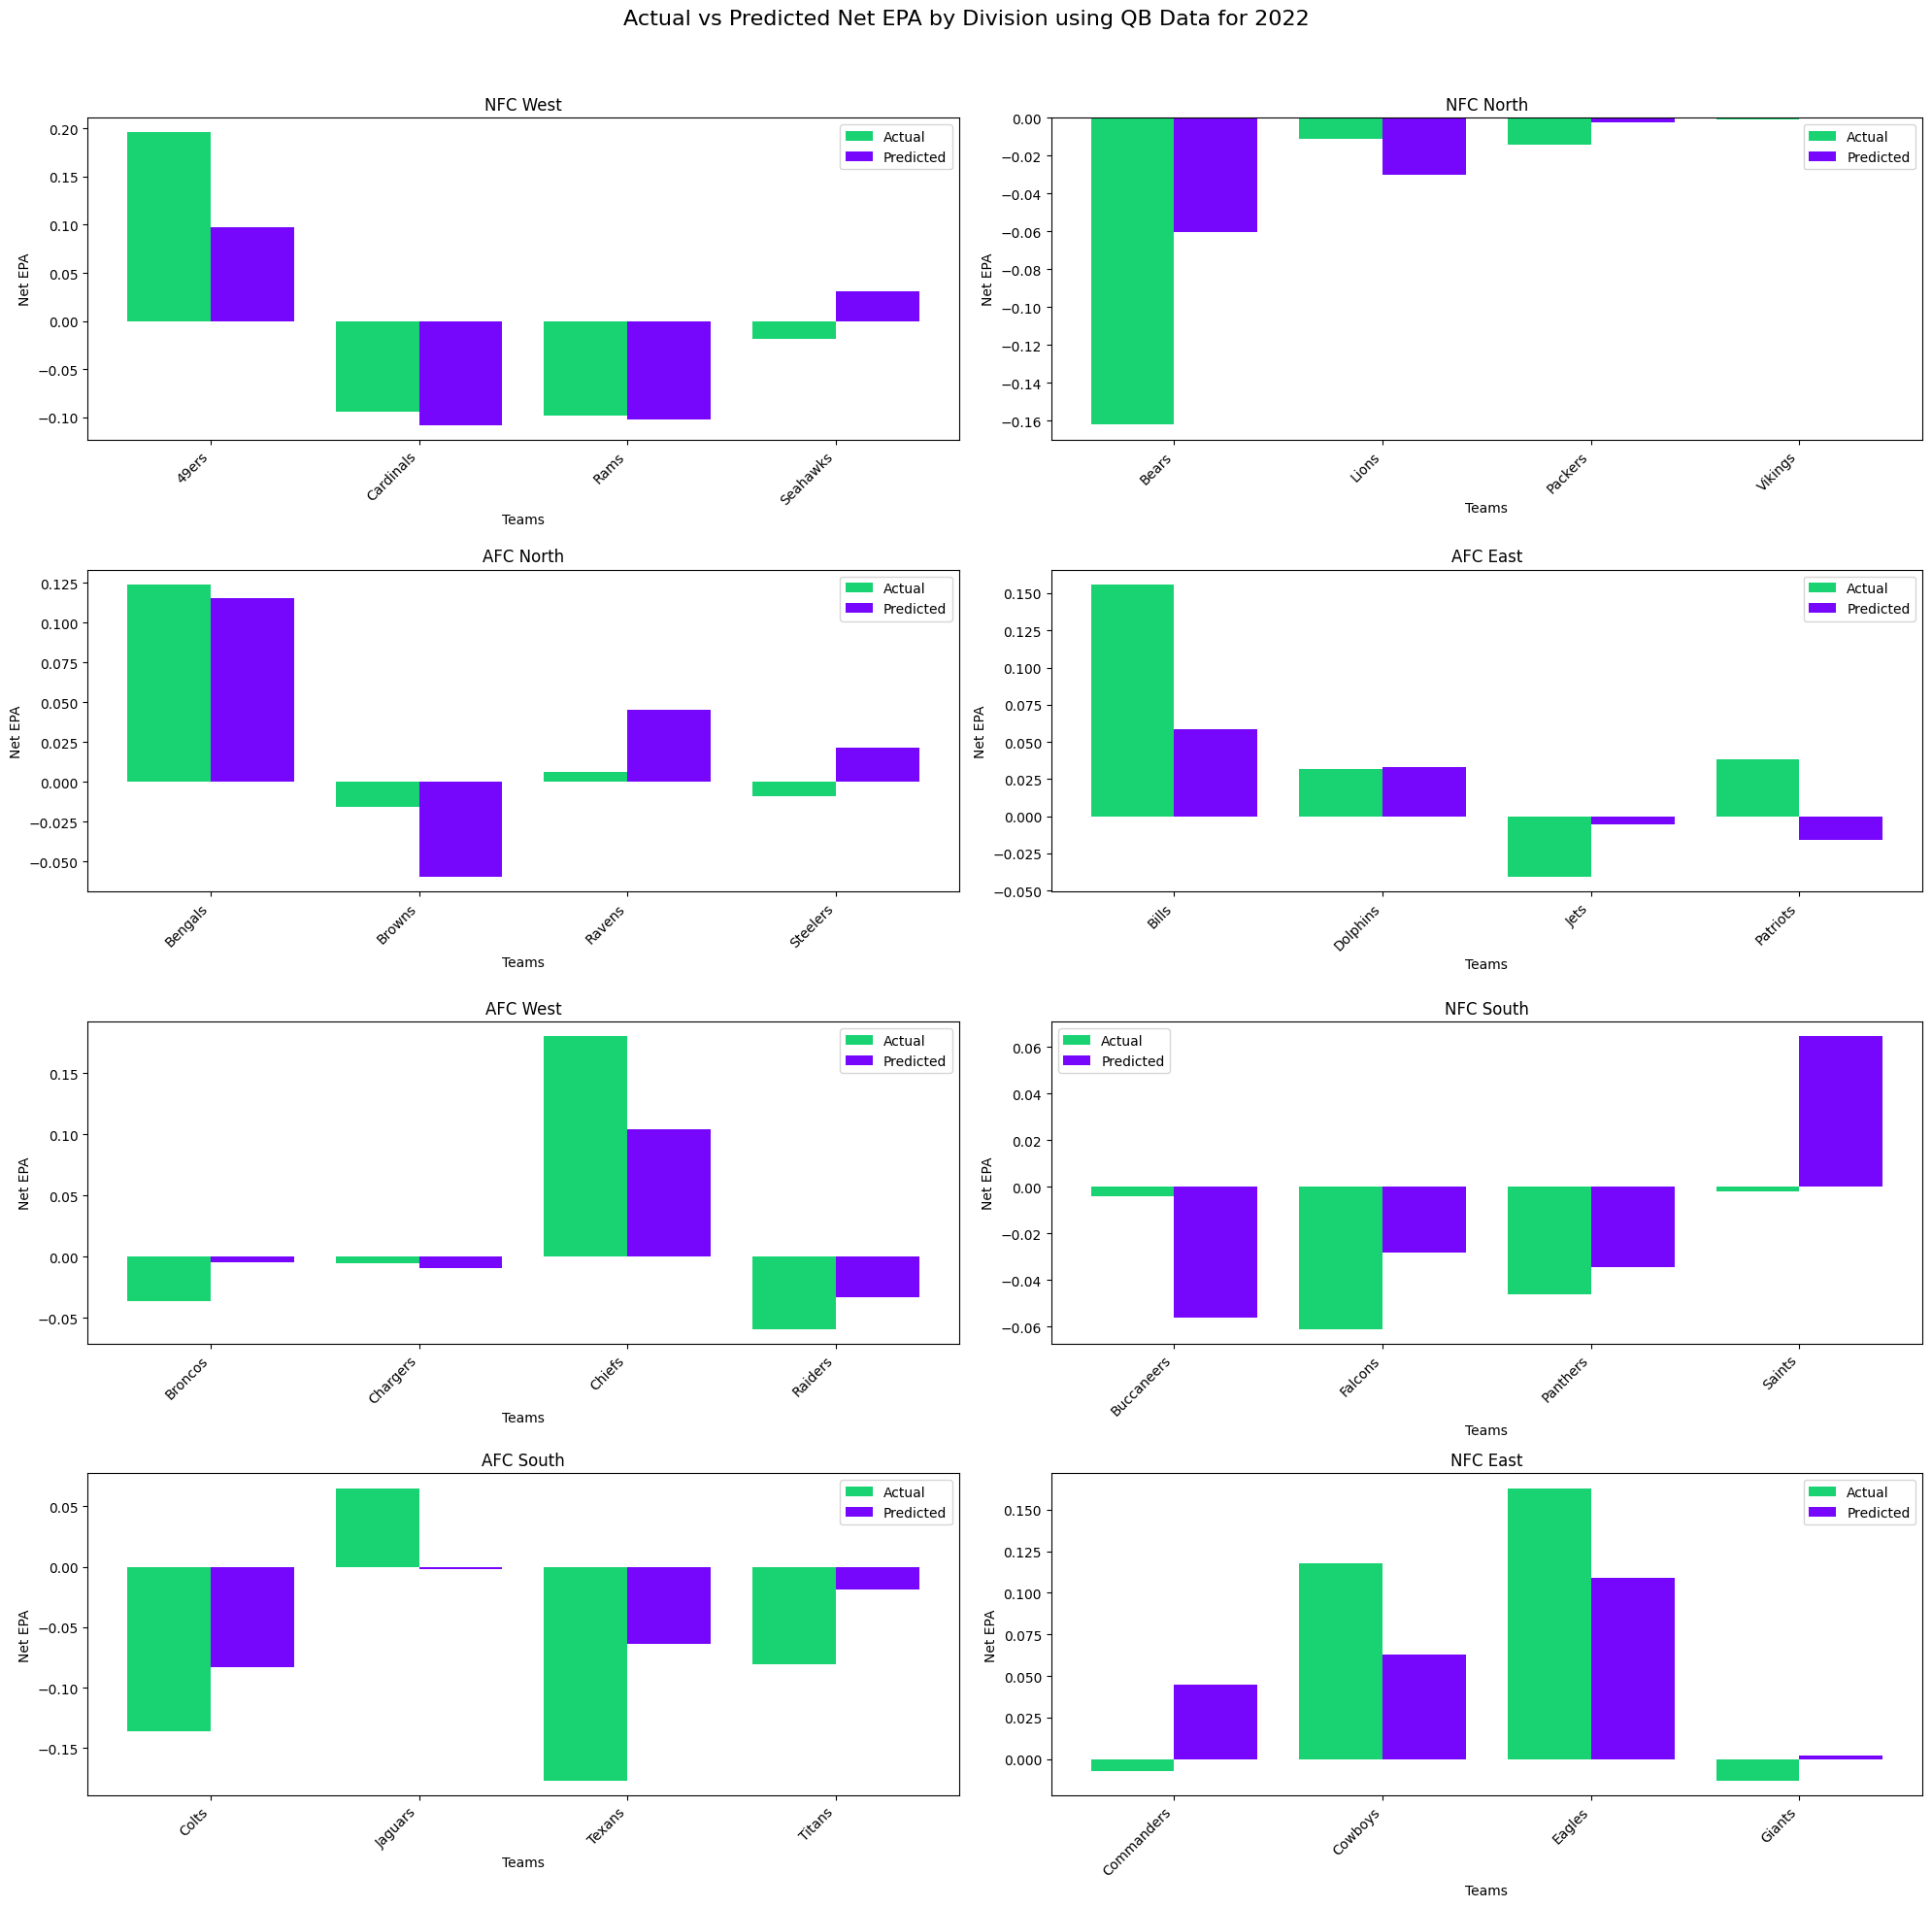

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029 - val_loss: 0.0042
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - val_loss: 0.0082
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045 - val_loss: 0.0085
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - val_loss: 0.0107
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032 - val_loss: 0.0049
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0065
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_lo

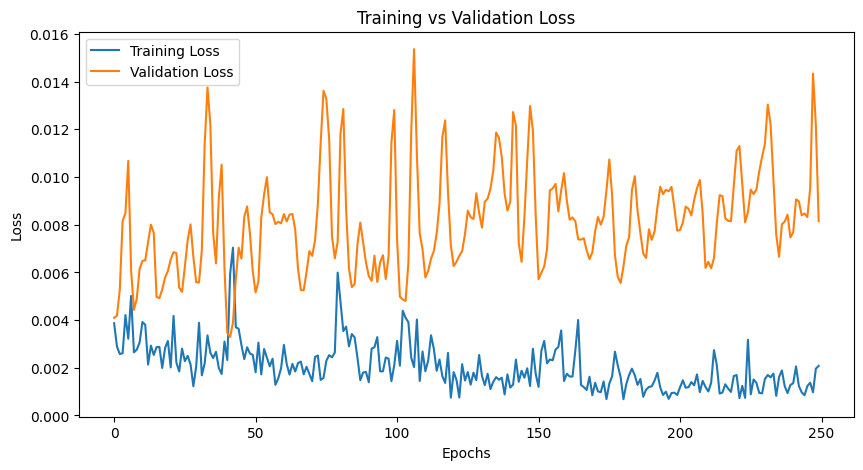

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R² Score: 0.7320


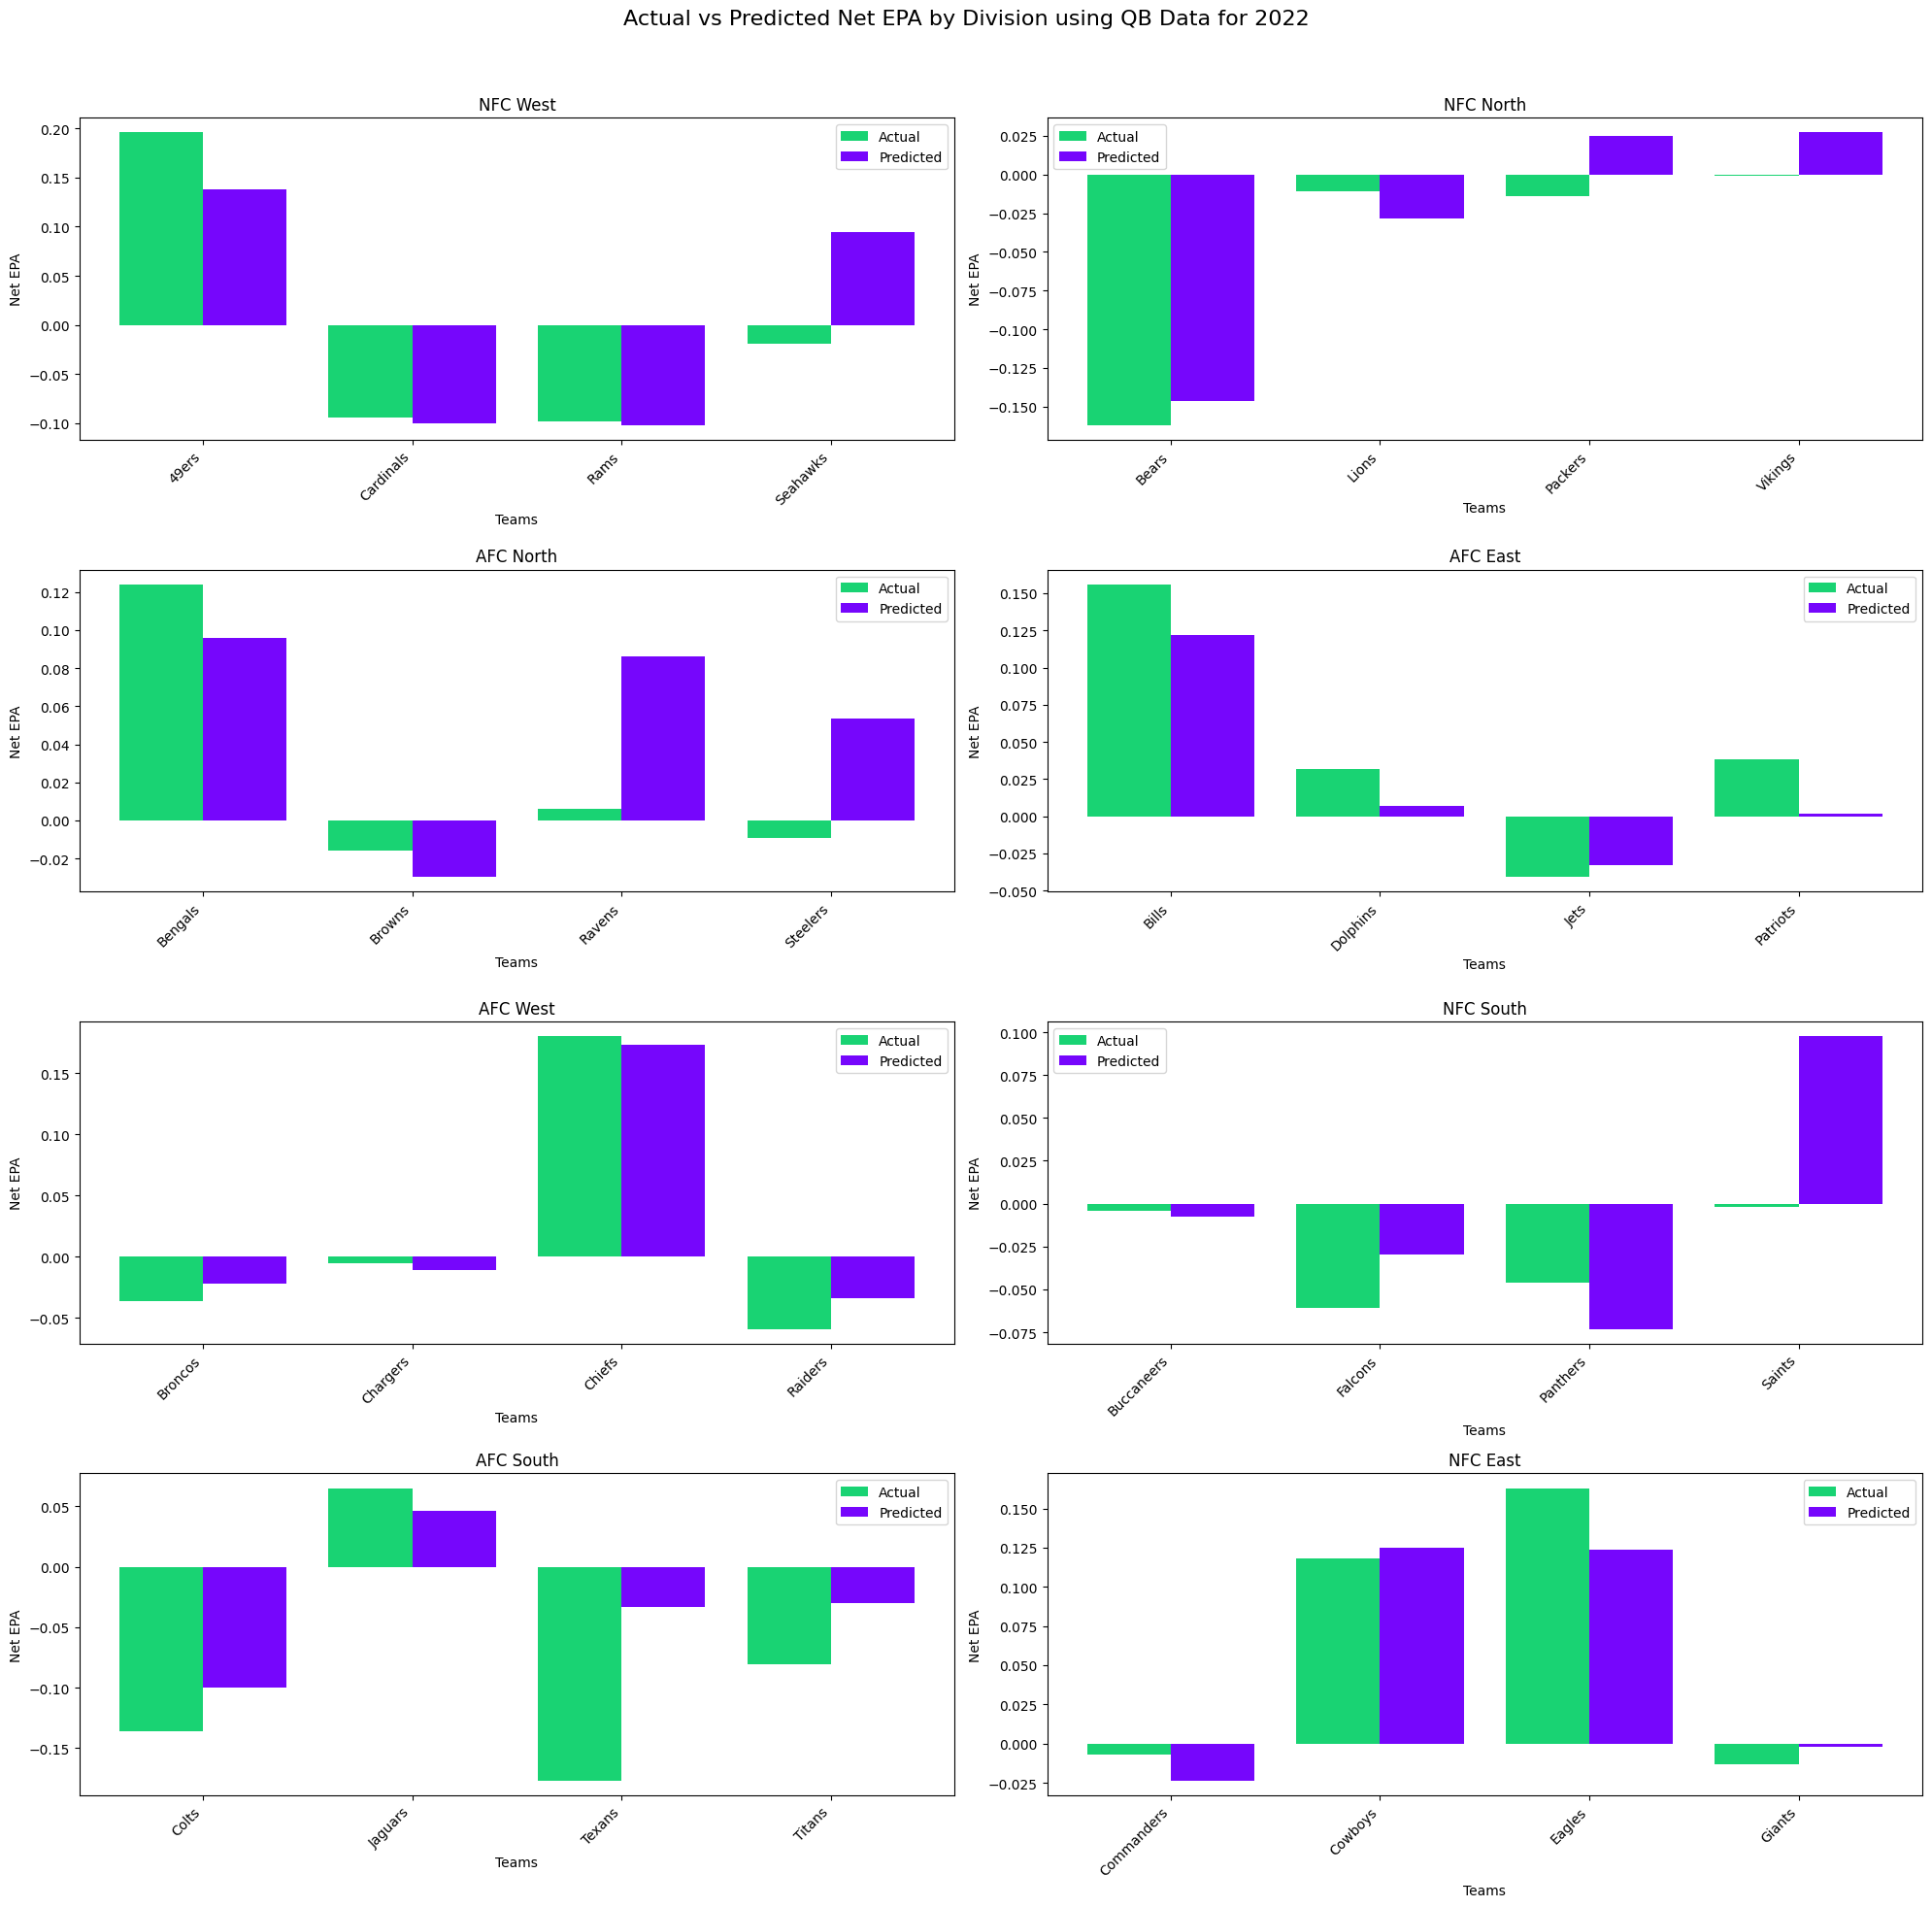

In [ ]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = df[df['Year'] == 2022].copy()
    data['Predicted_Net_EPA'] = y_pred
    data['Model Actual Net EPA'] = y
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Net EPA by Division using WR Data for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Net EPA')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
        

In [638]:
for ax, division in zip(axes.flatten(), divisions):
    fig.suptitle('Actual vs Predicted Net EPA by Division using WR Data for 2022', fontsize=16)
    division_data = data[data["Division"] == division]
    x = np.arange(4)  # Generate x-axis positions
    width = 0.4  # Bar width
    # Plot actual and predicted for this division
    ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
    ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
    
    ax.set_xticks(x)
    ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
    ax.set_title(division)
    ax.set_xlabel('Teams')
    ax.set_ylabel('Net EPA')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

<Figure size 640x480 with 0 Axes>

R² Score: 0.7320


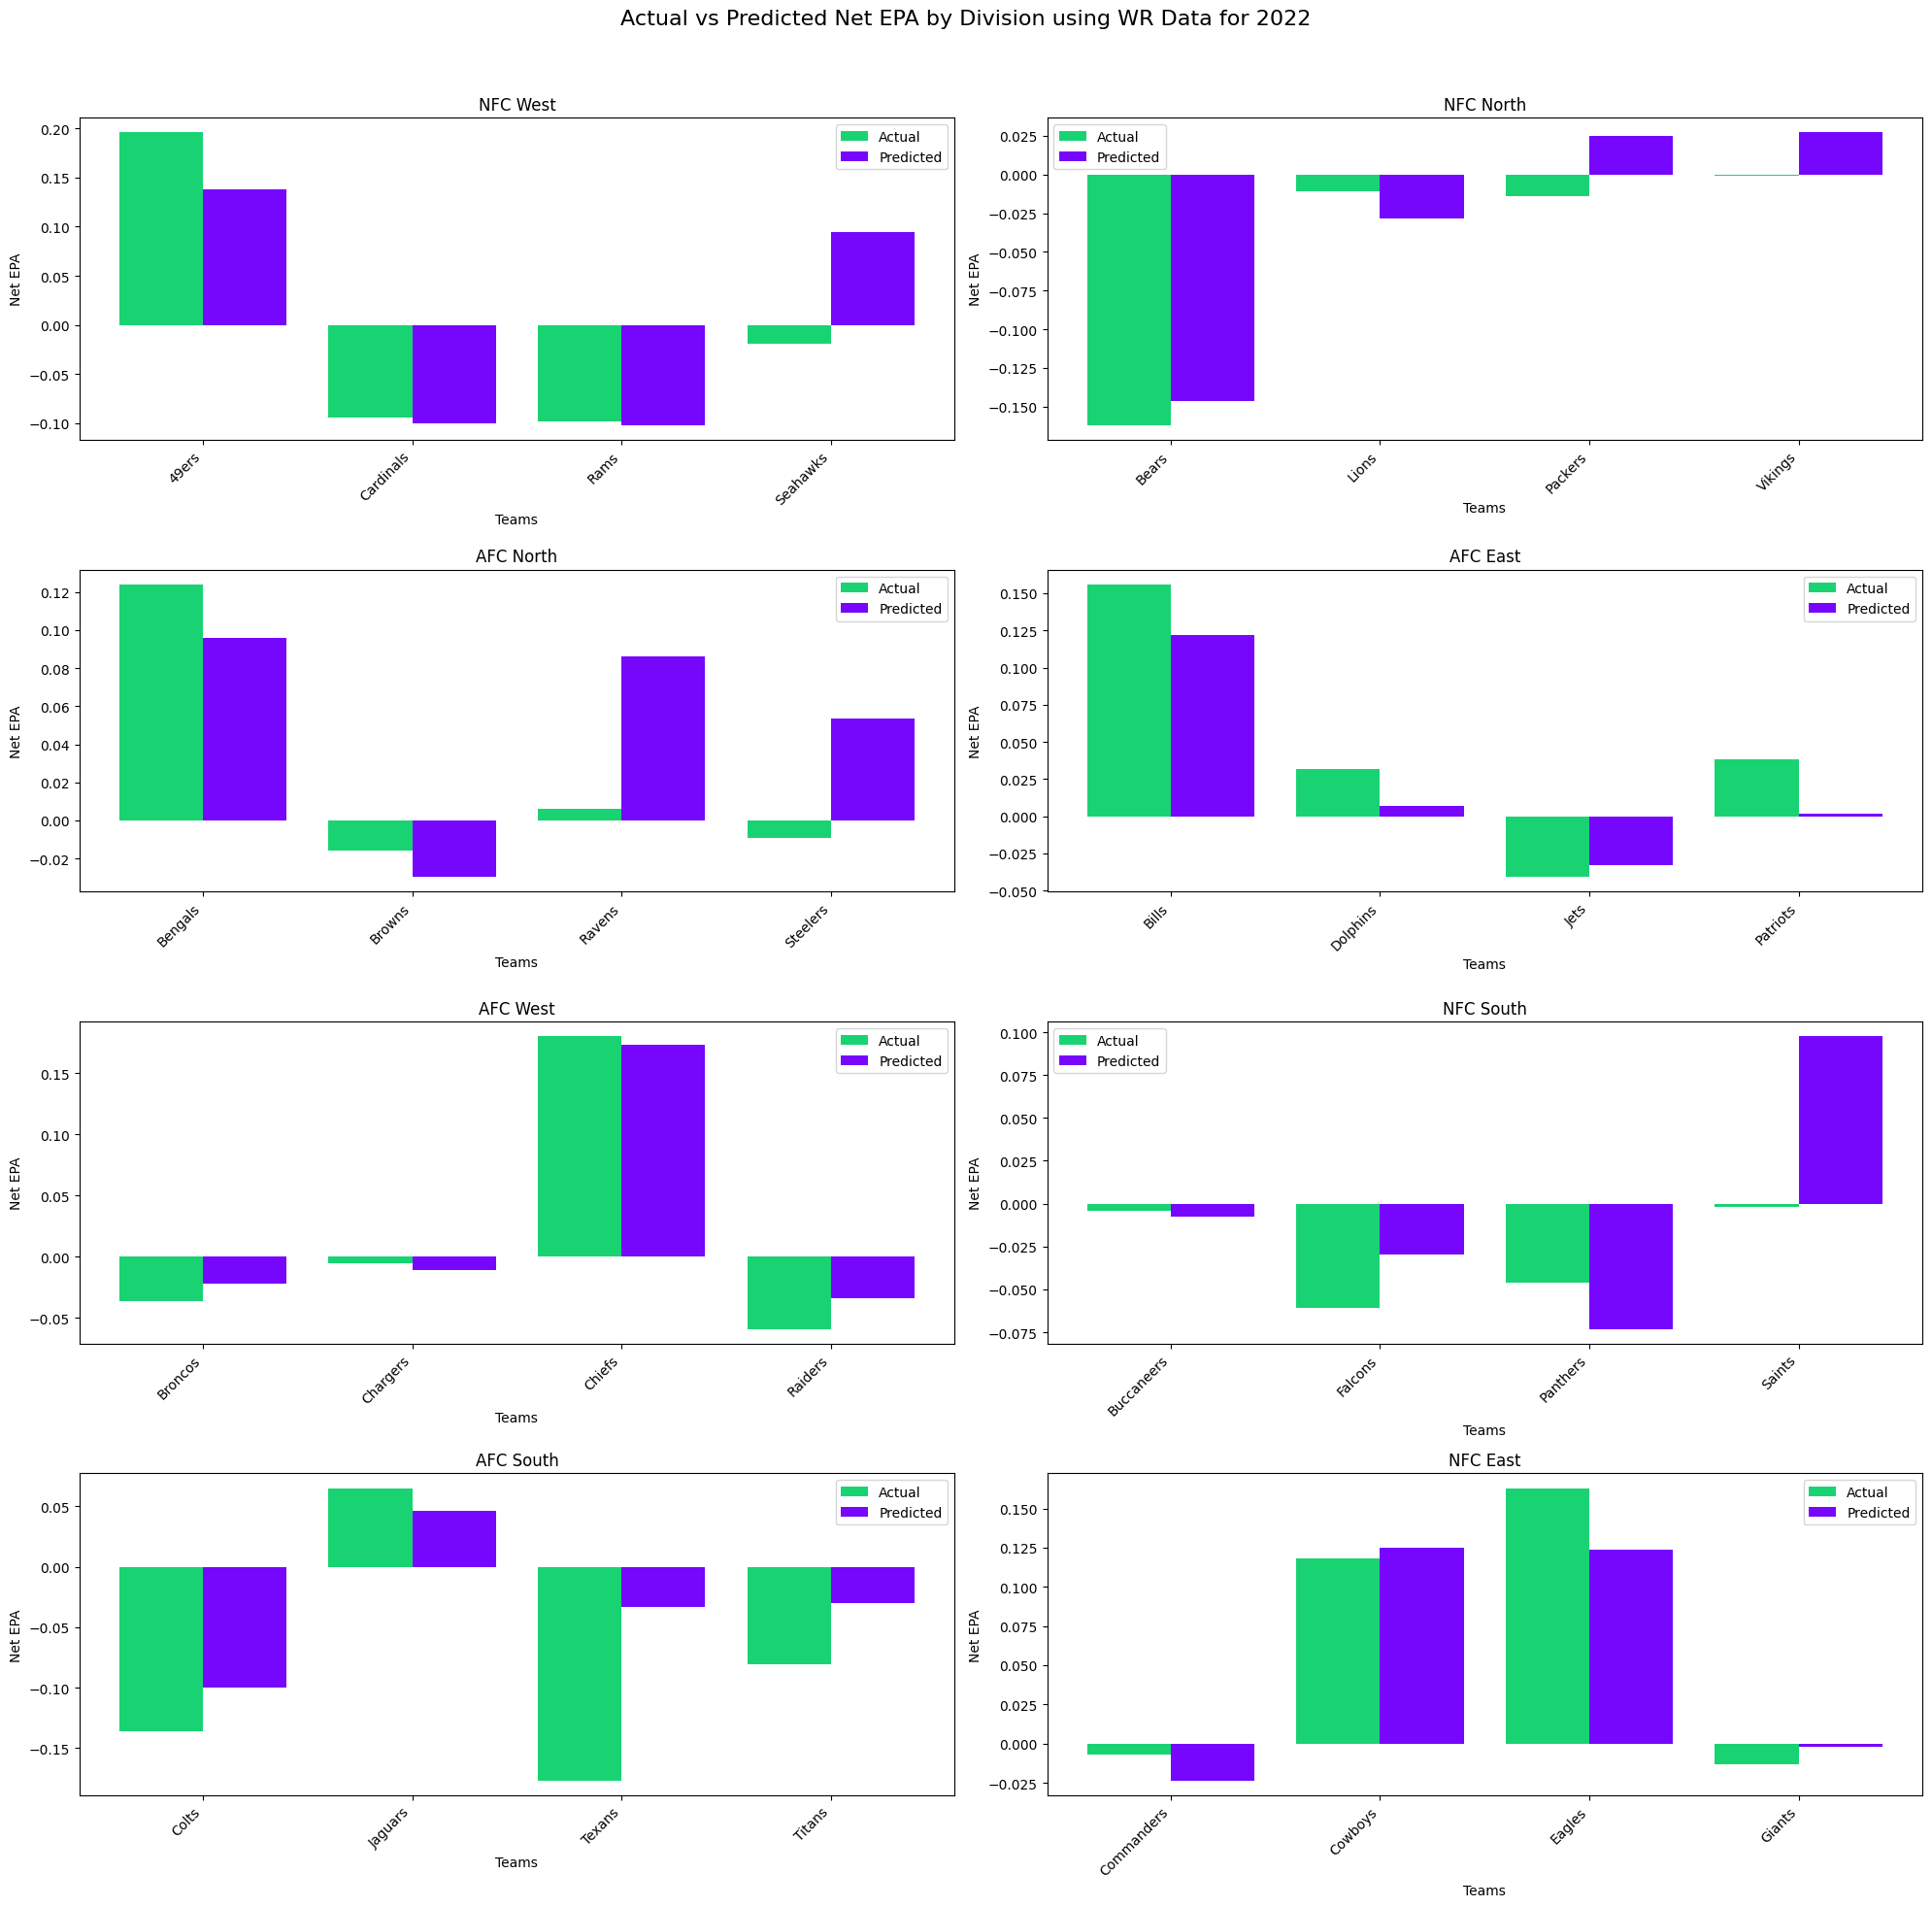

In [639]:
r2 = r2_score(y, y_pred)

    # Print R² score
print(f"R² Score: {r2:.4f}")
data = df[df['Year'] == 2022].copy()
data['Predicted_Net_EPA'] = y_pred
data['Model Actual Net EPA'] = y
divisions = {
"49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
"Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
"Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
"Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
"Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
"Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
"Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
"Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
"Vikings": "NFC North"
}

# Add the "Division" column
data["Division"] = data["Team"].map(divisions)
columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
data = data.loc[:, columns_to_keep]

divisions = data["Division"].unique()
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

for ax, division in zip(axes.flatten(), divisions):
    fig.suptitle('Actual vs Predicted Net EPA by Division using WR Data for 2022', fontsize=16)
    division_data = data[data["Division"] == division]
    x = np.arange(4)  # Generate x-axis positions
    width = 0.4  # Bar width
    # Plot actual and predicted for this division
    ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
    ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
    
    ax.set_xticks(x)
    ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
    ax.set_title(division)
    ax.set_xlabel('Teams')
    ax.set_ylabel('Net EPA')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()